In [1]:
# Re-importing necessary libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# prompt: import this data varied_employee_data_use_this_revised.xlsx

!pip install scikit-learn xgboost imbalanced-learn

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# # Load the newly uploaded dataset
# file_path = 'varied_employee_data_use_this_revised.csv'
# data = pd.read_csv(file_path)

In [199]:

# Load the dataset
try:
    data = pd.read_excel('/content/varied_employee_data_use_this_revised THIS ONE.xlsx')
except FileNotFoundError:
    print("Error: '/content/varied_employee_data_use_this_revised THIS ONE.xlsx' not found. Please upload the file to the current directory.")
    # Handle the error appropriately, e.g., exit the script or prompt the user for the file
    exit() # or raise the exception again, or other handling.

In [200]:
# prompt: display descriptive statistics for the data

# Display descriptive statistics
print(data.describe())
print(data.info())

       employee_id  job_satisfaction  engagement    belonging  recognition  \
count  5000.000000       5000.000000  5000.00000  5000.000000  5000.000000   
mean   2500.500000          3.846800     3.49600     3.569000     3.396000   
std    1443.520003          0.691538     0.92117     0.838916     0.979682   
min       1.000000          1.000000     1.00000     1.000000     1.000000   
25%    1250.750000          3.000000     3.00000     3.000000     3.000000   
50%    2500.500000          4.000000     4.00000     4.000000     4.000000   
75%    3750.250000          4.000000     4.00000     4.000000     4.000000   
max    5000.000000          5.000000     5.00000     5.000000     5.000000   

       growth_opportunity  work_life_balance  psychological_safety  \
count         5000.000000        5000.000000           5000.000000   
mean             3.280800           3.366200              3.699000   
std              0.921369           0.976467              0.850966   
min              

# Exploratory Data Analysis


### Crosstabs

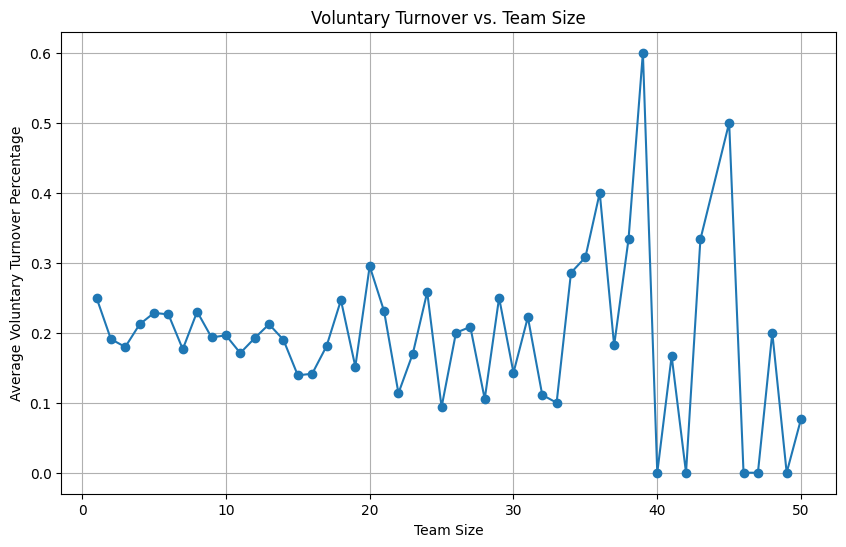

In [209]:
# prompt: create a graph to show how voluntary_turnover percentage changes with team_size.

import matplotlib.pyplot as plt

# Assuming 'team_size' and 'voluntary_turnover' are columns in your DataFrame 'data'
# Calculate the mean voluntary_turnover for each team_size
team_turnover = data.groupby('team_size')['voluntary_turnover'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(team_turnover['team_size'], team_turnover['voluntary_turnover'], marker='o')
plt.xlabel('Team Size')
plt.ylabel('Average Voluntary Turnover Percentage')
plt.title('Voluntary Turnover vs. Team Size')
plt.grid(True)
plt.show()

In [202]:
# prompt: generate crosstab to show   voluntary_turnover with each of the numeric variables including job_satisfaction	,engagement	belonging,	recognition	growth_opportunity,	work_life_balance,	psychological_safety	,culture	,satisfaction_with_supervisor, team_size, performance_rating round to integer. for each combination, conduct chi-sq test.

import pandas as pd
from scipy.stats import chi2_contingency

numeric_cols = ['job_satisfaction', 'engagement', 'belonging', 'recognition',
                'growth_opportunity', 'work_life_balance', 'psychological_safety',
                'culture', 'satisfaction_with_supervisor', 'team_size',
                'performance_rating']

for col in numeric_cols:
    # Create the crosstab
    crosstab = pd.crosstab(data['voluntary_turnover'], data[col].round(0))
    print(f"\nCrosstab for {col}:\n{crosstab}")

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"\nChi-square test for {col}:")
    print(f"Chi2 statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    #print(f"Expected frequencies:\n{expected}")


Crosstab for job_satisfaction:
job_satisfaction    1   2    3     4    5
voluntary_turnover                       
0                   1  81  617  2615  686
1                   0  98  477   422    3

Chi-square test for job_satisfaction:
Chi2 statistic: 751.7737478843633
P-value: 2.1409959182978117e-161
Degrees of freedom: 4

Crosstab for engagement:
engagement           1    2     3     4    5
voluntary_turnover                          
0                   33  371  1078  1931  587
1                   43  302   463   184    8

Chi-square test for engagement:
Chi2 statistic: 719.2060433253448
P-value: 2.4178055921372775e-154
Degrees of freedom: 4

Crosstab for belonging:
belonging            1    2     3     4    5
voluntary_turnover                          
0                   19  260  1011  2205  505
1                   24  245   517   207    7

Chi-square test for belonging:
Chi2 statistic: 781.5294968431244
P-value: 7.692214623429597e-168
Degrees of freedom: 4

Crosstab for recog

In [6]:
# prompt: generate 2 by 2 crosstable to show frequency for all combinations of categorical variables including job_level, department, race_ethnicity, region, work_arrangement in terms of voluntary_turnover percentage. round to integer. for each combination, conduct chi-sq test.

import pandas as pd
from scipy.stats import chi2_contingency

def analyze_categorical_variables(data, categorical_cols, target_col):
    """
    Generates 2x2 crosstabs, frequencies, and chi-square tests for combinations of categorical variables.

    Args:
      data: pandas DataFrame.
      categorical_cols: A list of categorical column names.
      target_col: The name of the target column (e.g., 'voluntary_turnover').
    """

    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 != col2:
                crosstab = pd.crosstab(data[col1], data[col2], values=data[target_col], aggfunc='mean') * 100  # Percentage
                crosstab = crosstab.round(0).astype(int)  # Round to integer


                print(f"Crosstab for {col1} vs. {col2} (Voluntary Turnover Percentage):")
                print(crosstab)

                # Chi-Square Test
                contingency_table = pd.crosstab(data[col1], data[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"\nChi-square test for {col1} vs. {col2}:")
                print(f"Chi2 statistic: {chi2:.2f}")
                print(f"P-value: {p:.3f}")
                print("-" * 50)  # Separator


# Example usage:
categorical_cols = ['job_level', 'department', 'race_ethnicity', 'region', 'work_arrangement']
target_col = 'voluntary_turnover'  # Replace with your actual target column name

analyze_categorical_variables(data, categorical_cols, target_col)

Crosstab for job_level vs. department (Voluntary Turnover Percentage):
department                     Engineering  Finance  HR  Legal  Marketing  \
job_level                                                                   
Director                                15       11  39     11         25   
Individual Contributor                  18       21  23     16         19   
Manager                                 20       15   6     20         17   
Senior Director                         10        0  20     33          0   
Senior Individual Contributor           21       13  12     15         21   
Senior Manager                          24       25  18     13         30   

department                     Operations  Product  Sales  
job_level                                                  
Director                               29       22     22  
Individual Contributor                 24       23     21  
Manager                                21       11     20  
Senior Direc

In [7]:
# prompt: generate a  cross tab between work_arrangement and job_level in terms of voluntary_turnover  percentrage. export  to an excel

# Assuming 'data' DataFrame is already loaded as in the previous code.

def crosstab_and_export(data, col1, col2, target_col, filename):
    """
    Generates a crosstab between two categorical columns in terms of a target variable's percentage and exports to Excel.

    Args:
        data: pandas DataFrame.
        col1: Name of the first categorical column.
        col2: Name of the second categorical column.
        target_col: Name of the target variable column.
        filename: Name of the output Excel file.
    """
    crosstab = pd.crosstab(data[col1], data[col2], values=data[target_col], aggfunc='mean') * 100
    crosstab = crosstab.round(0).astype(int)

    # Export to Excel
    crosstab.to_excel(filename)
    print(f"Crosstab exported to {filename}")


# Example usage:
crosstab_and_export(data, 'work_arrangement', 'job_level', 'voluntary_turnover', 'work_arrangement_job_level_crosstab.xlsx')

Crosstab exported to work_arrangement_job_level_crosstab.xlsx


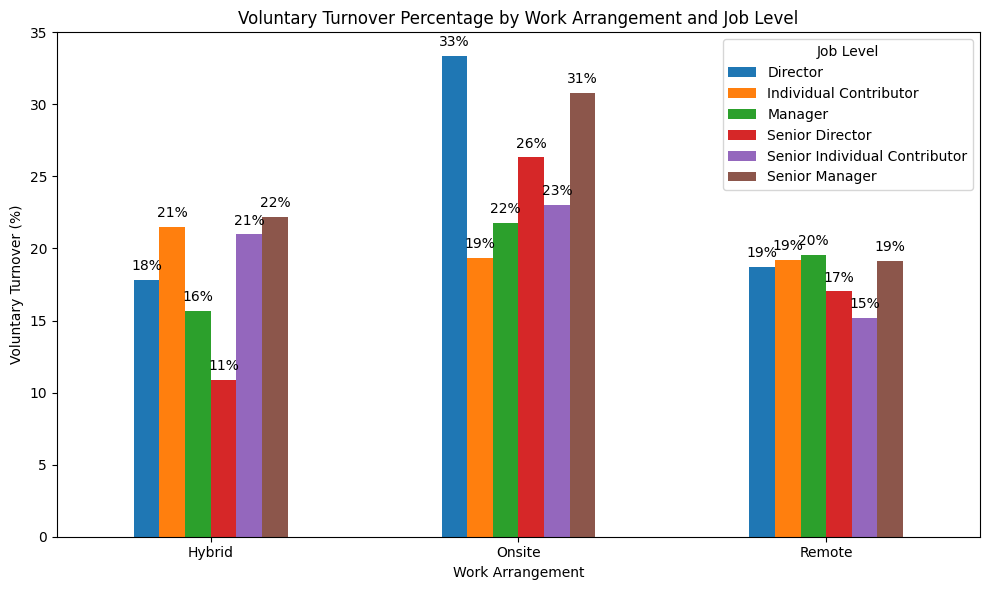

In [8]:
# prompt: generate a  bar graph between work_arrangement and job_level in terms of voluntary_turnover  percentrage. add values to the graph

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' DataFrame is already loaded and processed as in the previous code

def plot_turnover_by_work_arrangement_and_job_level(data):
    """
    Generates a bar plot showing voluntary turnover percentage by work arrangement and job level.
    """

    # Calculate voluntary turnover percentage for each combination
    turnover_rates = data.groupby(['work_arrangement', 'job_level'])['voluntary_turnover'].mean() * 100
    turnover_rates = turnover_rates.unstack()  # Pivot the table

    # Plotting
    ax = turnover_rates.plot(kind='bar', figsize=(10, 6))
    plt.title('Voluntary Turnover Percentage by Work Arrangement and Job Level')
    plt.xlabel('Work Arrangement')
    plt.ylabel('Voluntary Turnover (%)')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.legend(title='Job Level')

    # Add value labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

plot_turnover_by_work_arrangement_and_job_level(data)

In [9]:
# prompt: generate a data frame for the cross tab between work_arrangement and job_level in terms of voluntary_turnover percentage, export to an excel.

import pandas as pd

# Assuming 'data' DataFrame is already loaded as in the previous code

def create_crosstab_and_export(data, col1, col2, target_col, filename):
    """
    Creates a crosstab between two categorical variables based on the percentage of a target variable
    and exports it to an Excel file.
    """
    crosstab = pd.crosstab(data[col1], data[col2], values=data[target_col], aggfunc='mean') * 100
    crosstab = crosstab.round(0).astype(int)

    # Export to Excel
    crosstab.to_excel(filename, index=True)
    print(f"Crosstab exported to '{filename}'")
    return crosstab

# Example Usage
col1 = 'work_arrangement'
col2 = 'job_level'
target_col = 'voluntary_turnover'
filename = 'work_arrangement_job_level_crosstab.xlsx'

crosstab_result = create_crosstab_and_export(data, col1, col2, target_col, filename)

print(crosstab_result) # Display the crosstab in the output

Crosstab exported to 'work_arrangement_job_level_crosstab.xlsx'
job_level         Director  Individual Contributor  Manager  Senior Director  \
work_arrangement                                                               
Hybrid                  18                      21       16               11   
Onsite                  33                      19       22               26   
Remote                  19                      19       20               17   

job_level         Senior Individual Contributor  Senior Manager  
work_arrangement                                                 
Hybrid                                       21              22  
Onsite                                       23              31  
Remote                                       15              19  


### Descriptives

In [10]:
# prompt:  show frequency for all categorical variables including job_level, department, race_ethnicity, region, work_arrangement in terms of voluntary_turnover  . round to integer. for each one, conduct chi-sq test.

def analyze_categorical_variables(data, categorical_cols, target_col):
    """
    Generates frequency tables and chi-square tests for categorical variables.
    """
    for col in categorical_cols:
        # Frequency table
        freq_table = pd.crosstab(data[col], data[target_col])
        print(f"\nFrequency Table for {col}:")
        print(freq_table)

        # Chi-square test
        chi2, p, dof, expected = chi2_contingency(freq_table)
        print(f"\nChi-square test for {col}:")
        print(f"Chi2 statistic: {chi2:.2f}")
        print(f"P-value: {p:.3f}")
        print("-" * 50)  # Separator

# Example usage (assuming 'data' is your DataFrame):
categorical_cols = ['job_level', 'department', 'race_ethnicity', 'region', 'work_arrangement']
target_col = 'voluntary_turnover'

analyze_categorical_variables(data, categorical_cols, target_col)


Frequency Table for job_level:
voluntary_turnover                0    1
job_level                               
Director                        196   53
Individual Contributor         1811  464
Manager                         618  136
Senior Director                 102   19
Senior Individual Contributor   956  233
Senior Manager                  317   95

Chi-square test for job_level:
Chi2 statistic: 6.22
P-value: 0.285
--------------------------------------------------

Frequency Table for department:
voluntary_turnover     0    1
department                   
Engineering         1201  289
Finance              285   61
HR                   204   47
Legal                187   36
Marketing            338   82
Operations           568  167
Product              413  102
Sales                804  216

Chi-square test for department:
Chi2 statistic: 8.24
P-value: 0.312
--------------------------------------------------

Frequency Table for race_ethnicity:
voluntary_turnover     0    1
r

In [11]:
# prompt: generate table to show frequency for categorical variables (, job_level, department, race_ethnicity, region, work_arrangement) in terms of voluntary_turnover, round to 2 digits

import pandas as pd

def create_frequency_table(data, categorical_cols, target_col):
    """
    Generates a frequency table for categorical variables in relation to a target variable.

    Args:
        data: The input DataFrame.
        categorical_cols: A list of column names representing categorical variables.
        target_col: The name of the target variable column.

    Returns:
        A pandas DataFrame representing the frequency table.
    """

    frequency_tables = {}
    for col in categorical_cols:
        frequency_table = pd.crosstab(data[col], data[target_col], normalize='index') * 100
        frequency_table = frequency_table.round(2)
        frequency_tables[col] = frequency_table

    return frequency_tables


categorical_variables = ['job_level', 'department', 'race_ethnicity', 'region', 'work_arrangement']
frequency_tables = create_frequency_table(data, categorical_variables, 'voluntary_turnover')

for col, table in frequency_tables.items():
    print(f"Frequency Table for {col}:")
    print(table)
    print("\n")

Frequency Table for job_level:
voluntary_turnover                 0      1
job_level                                  
Director                       78.71  21.29
Individual Contributor         79.60  20.40
Manager                        81.96  18.04
Senior Director                84.30  15.70
Senior Individual Contributor  80.40  19.60
Senior Manager                 76.94  23.06


Frequency Table for department:
voluntary_turnover      0      1
department                      
Engineering         80.60  19.40
Finance             82.37  17.63
HR                  81.27  18.73
Legal               83.86  16.14
Marketing           80.48  19.52
Operations          77.28  22.72
Product             80.19  19.81
Sales               78.82  21.18


Frequency Table for race_ethnicity:
voluntary_turnover      0      1
race_ethnicity                  
Asian               78.52  21.48
Black               79.57  20.43
Hispanic            81.06  18.94
Other               80.36  19.64
Two or More Races

In [12]:
# prompt: generate a data frame to show descriptive statistics for numeric variables (excluding employee_id). round to 2 digits

numeric_cols = data.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop('employee_id')
descriptive_stats = data[numeric_cols].describe().round(2)
descriptive_stats

,job_satisfaction,engagement,belonging,recognition,growth_opportunity,work_life_balance,psychological_safety,culture,satisfaction_with_supervisor,tenure_years,months_since_promotion,team_size,performance_rating,weekly_work_hours,salary_ratio,voluntary_turnover
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.0
mean,3.85,3.50,3.57,3.40,3.28,3.37,3.70,3.51,3.58,3.87,4.99,9.98,3.67,59.74,1.00,0.2
std,0.69,0.92,0.84,0.98,0.92,0.98,0.85,0.87,0.90,3.77,5.00,7.47,0.76,3.83,0.16,0.4
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,47.00,0.51,0.0
25%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,1.00,5.00,3.00,57.00,0.89,0.0
50%,4.00,4.00,4.00,4.00,3.00,3.00,4.00,4.00,4.00,3.00,3.00,8.00,4.00,60.00,0.99,0.0
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,7.00,13.00,4.00,63.00,1.10,0.0
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,20.00,36.00,50.00,5.00,65.00,1.98,1.0


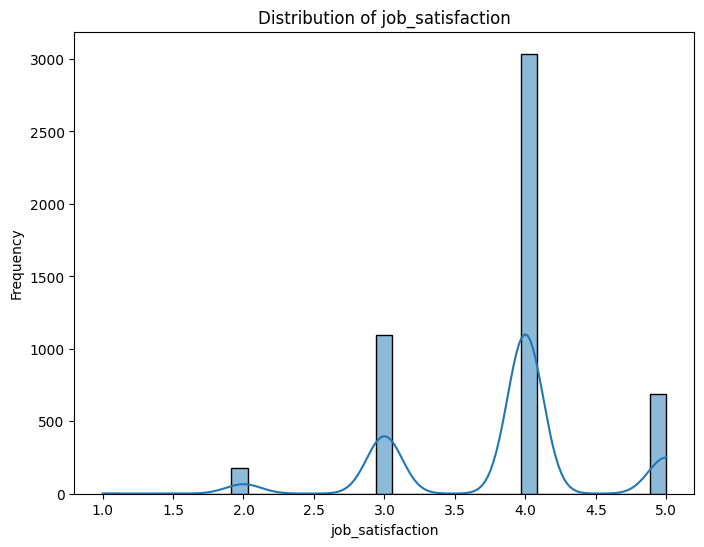

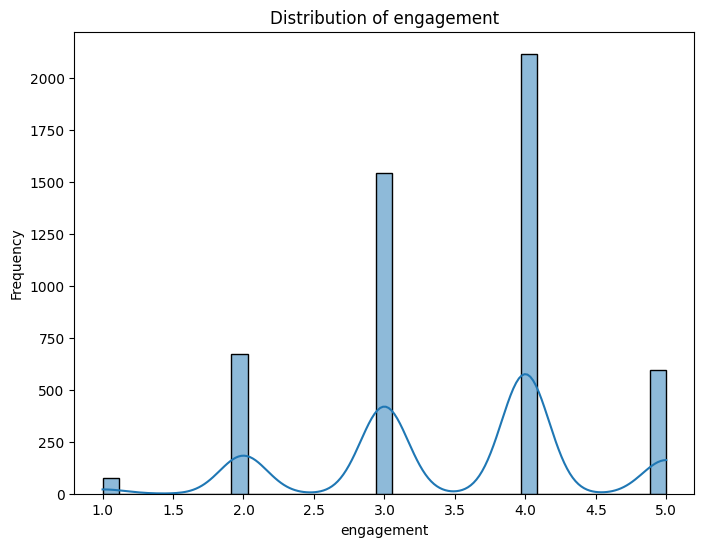

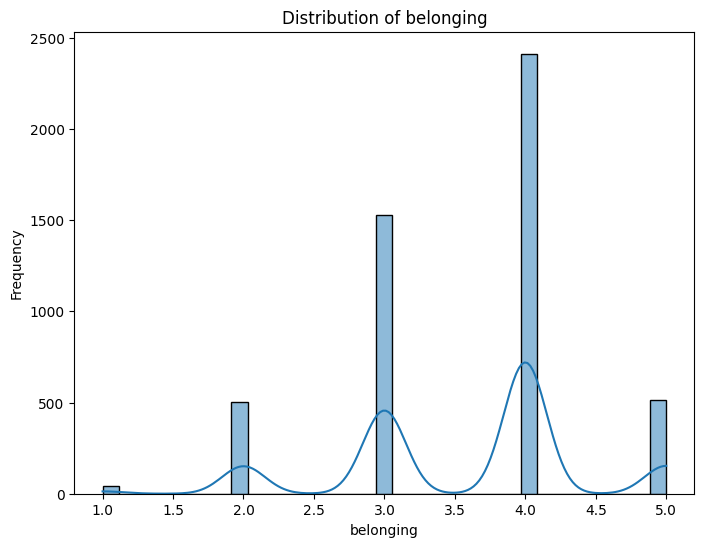

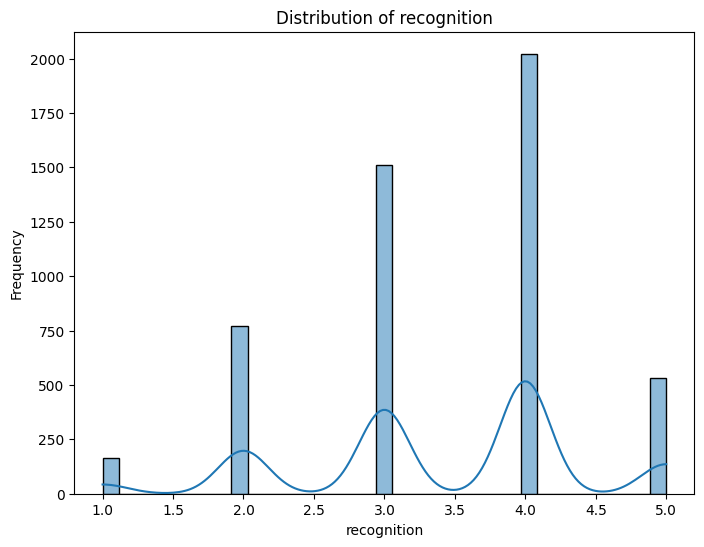

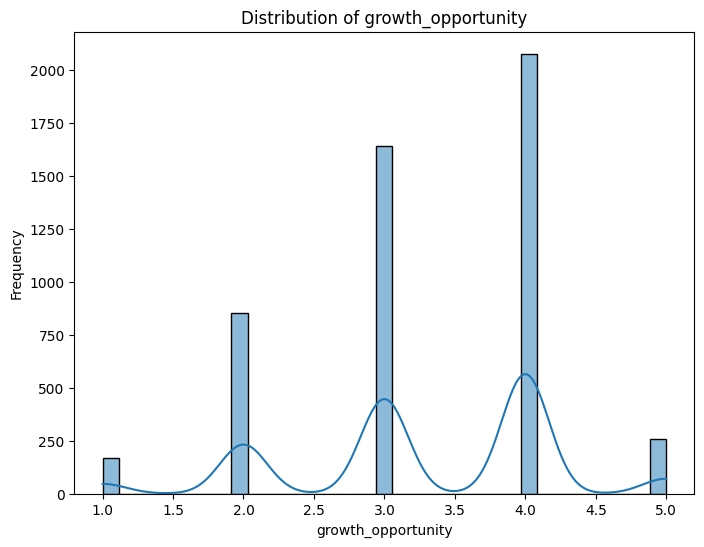

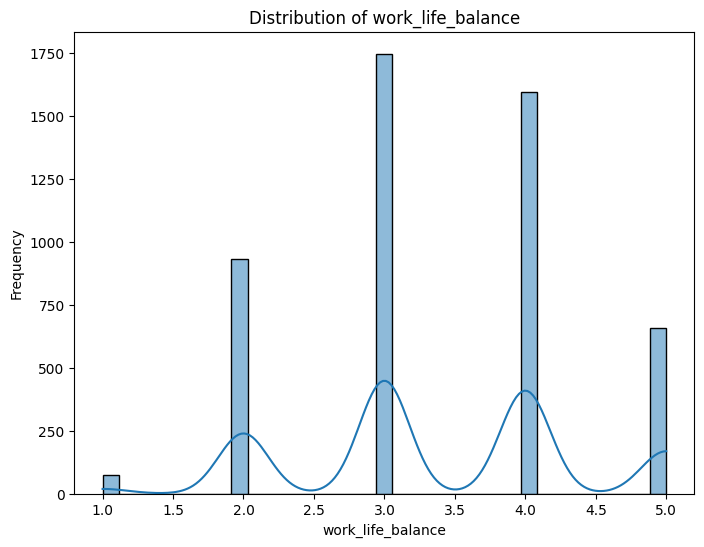

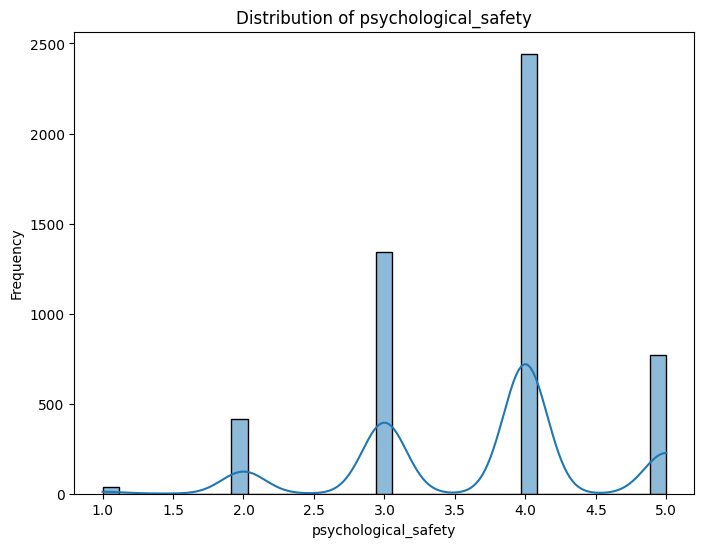

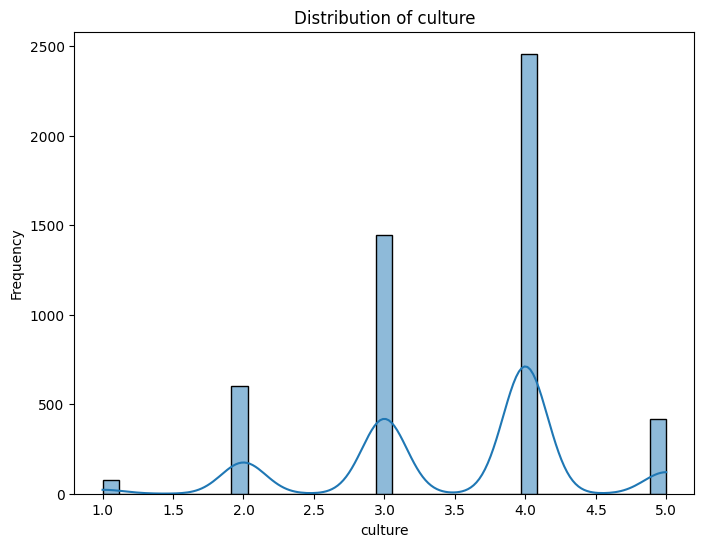

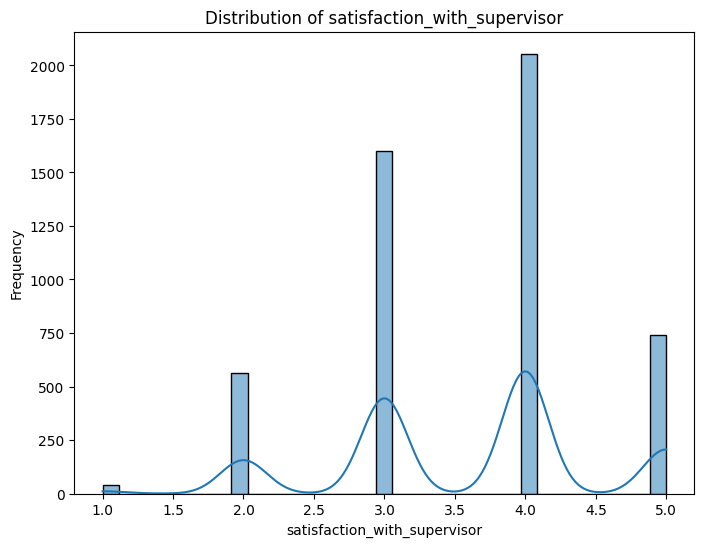

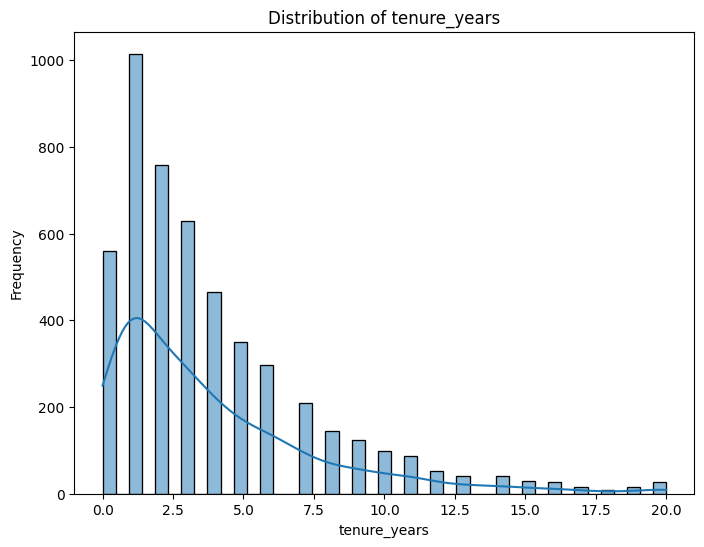

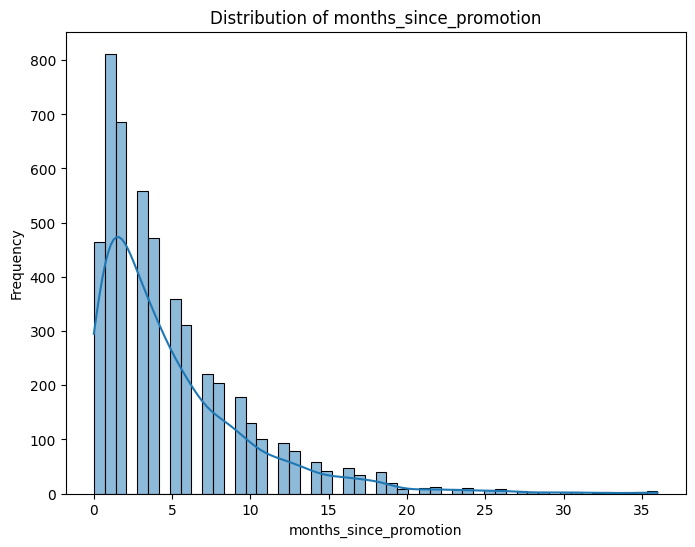

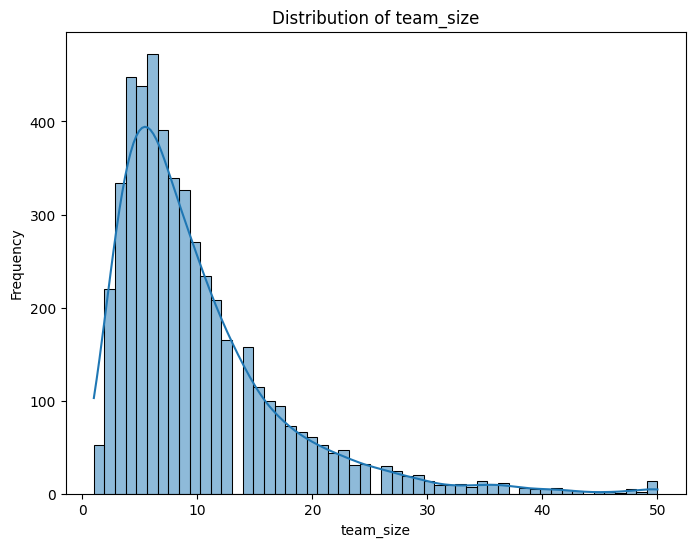

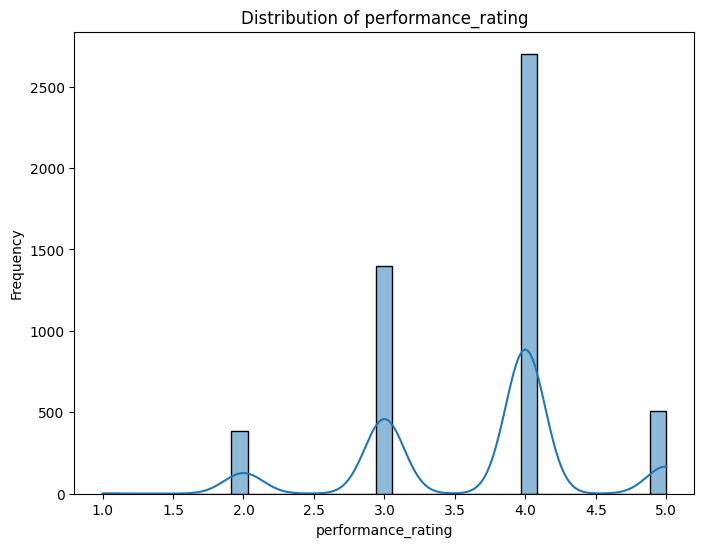

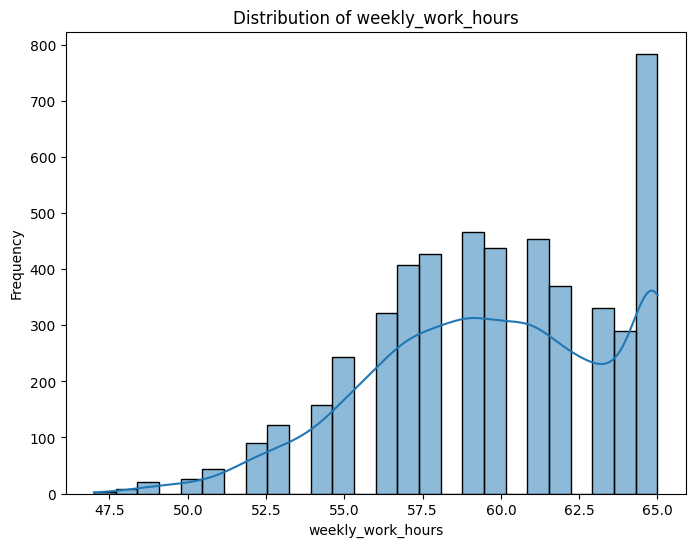

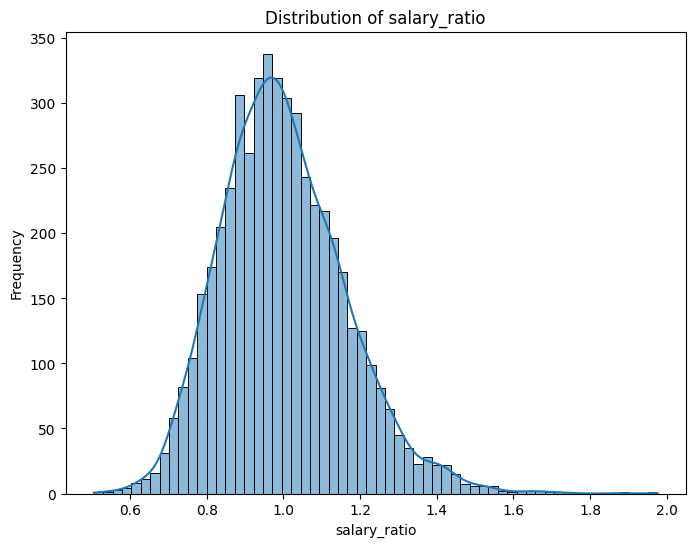

In [13]:
# prompt: generate graphs to show the distributions for numeric variables (excluding employee_id, voluntary_turnover). round to 2 digits

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame and 'numeric_cols' are defined from the previous code

for col in numeric_cols:
    if col != 'voluntary_turnover':  # Exclude the target variable
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

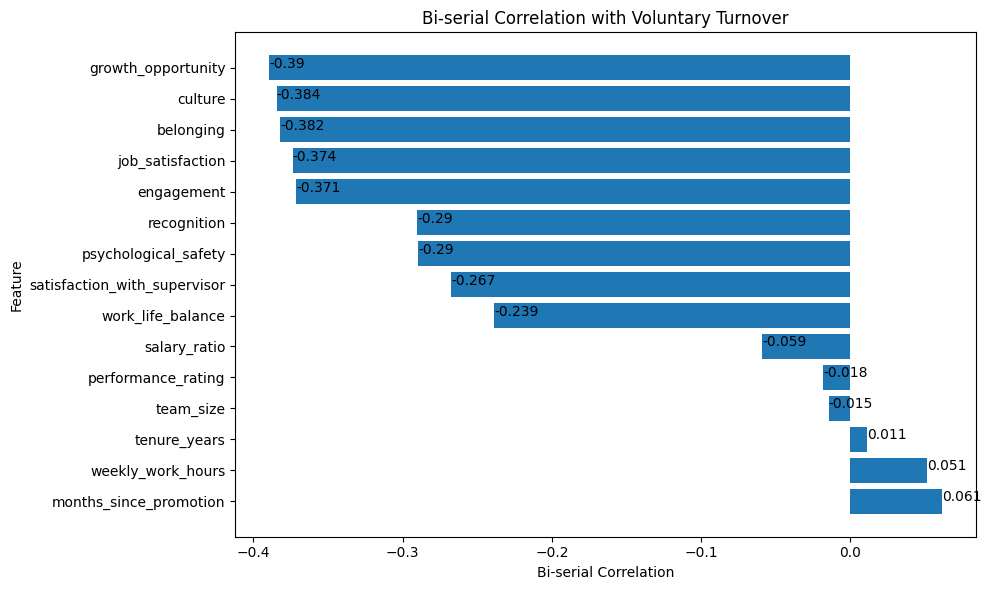

In [14]:
# prompt: calculate bi-serial correlation between voluntary_turnover and other numeric variables (excluding employee_id, job_level, department, race_ethnicity, region, work_arrangement).  create a horizontal graph.add value to the graph. list the correlation in descending order.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Assuming 'data' DataFrame is already loaded as in the previous code

# Define the columns to exclude
exclude_cols = ['employee_id', 'job_level', 'department', 'race_ethnicity', 'region', 'work_arrangement', 'voluntary_turnover']

# Calculate bi-serial correlation
correlations = []
for col in data.columns:
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(data[col]):
        try:
            correlation, p_value = pointbiserialr(data['voluntary_turnover'], data[col])
            correlations.append((col, correlation, p_value))
        except ValueError:  # Handle potential errors during calculation
          print(f"Error calculating point-biserial correlation for {col}. Skipping.")
          continue

# Create a DataFrame for correlations
correlation_df = pd.DataFrame(correlations, columns=['Feature', 'Correlation', 'P-value'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(correlation_df['Feature'], correlation_df['Correlation'])
plt.xlabel('Bi-serial Correlation')
plt.ylabel('Feature')
plt.title('Bi-serial Correlation with Voluntary Turnover')

# Add value labels to the bars
for index, value in enumerate(correlation_df['Correlation']):
    plt.text(value, index, str(round(value, 3)))  # Show the correlation value rounded to 3 decimals

plt.tight_layout()
plt.show()

# Print the correlation coefficients in descending order
correlation_df

correlation_df.to_csv('correlation_df.csv', index=False)  # index=False prevents row indices from being written


In [15]:
correlation_df

,Feature,Correlation,P-value
10,months_since_promotion,0.061332,1.425913e-05
13,weekly_work_hours,0.051294,2.850889e-04
9,tenure_years,0.011133,4.312561e-01
11,team_size,-0.014585,3.024860e-01
12,performance_rating,-0.018457,1.919208e-01
14,salary_ratio,-0.058978,3.006650e-05
5,work_life_balance,-0.238742,9.565886e-66
8,satisfaction_with_supervisor,-0.267332,1.415420e-82
6,psychological_safety,-0.289700,2.846027e-97
3,recognition,-0.290430,8.940817e-98


In [16]:
# prompt: calculate bi-serial correlation between voluntary_turnover and other numeric variables (excluding employee_id, job_level, department, race_ethnicity, region, work_arrangement).  list in a table, in descending order.

import pandas as pd
from scipy.stats import pointbiserialr

# Assuming 'data' DataFrame is already loaded as in the previous code

# Define the columns to exclude
exclude_cols = ['employee_id', 'job_level', 'department', 'race_ethnicity', 'region', 'work_arrangement', 'voluntary_turnover']

# Identify numeric columns for biserial correlation
numeric_cols = [col for col in data.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(data[col])]

# Calculate biserial correlations and store in a DataFrame
biserial_correlations = []
for col in numeric_cols:
    correlation, p_value = pointbiserialr(data['voluntary_turnover'], data[col])
    biserial_correlations.append({'Variable': col, 'Correlation': correlation, 'P-value':p_value})

biserial_df = pd.DataFrame(biserial_correlations)

# Sort the DataFrame by correlation in descending order
biserial_df_sorted = biserial_df.sort_values(by='Correlation', ascending=False)

# Display the table
biserial_df_sorted

,Variable,Correlation,P-value
10,months_since_promotion,0.061332,1.425913e-05
13,weekly_work_hours,0.051294,2.850889e-04
9,tenure_years,0.011133,4.312561e-01
11,team_size,-0.014585,3.024860e-01
12,performance_rating,-0.018457,1.919208e-01
14,salary_ratio,-0.058978,3.006650e-05
5,work_life_balance,-0.238742,9.565886e-66
8,satisfaction_with_supervisor,-0.267332,1.415420e-82
6,psychological_safety,-0.289700,2.846027e-97
3,recognition,-0.290430,8.940817e-98


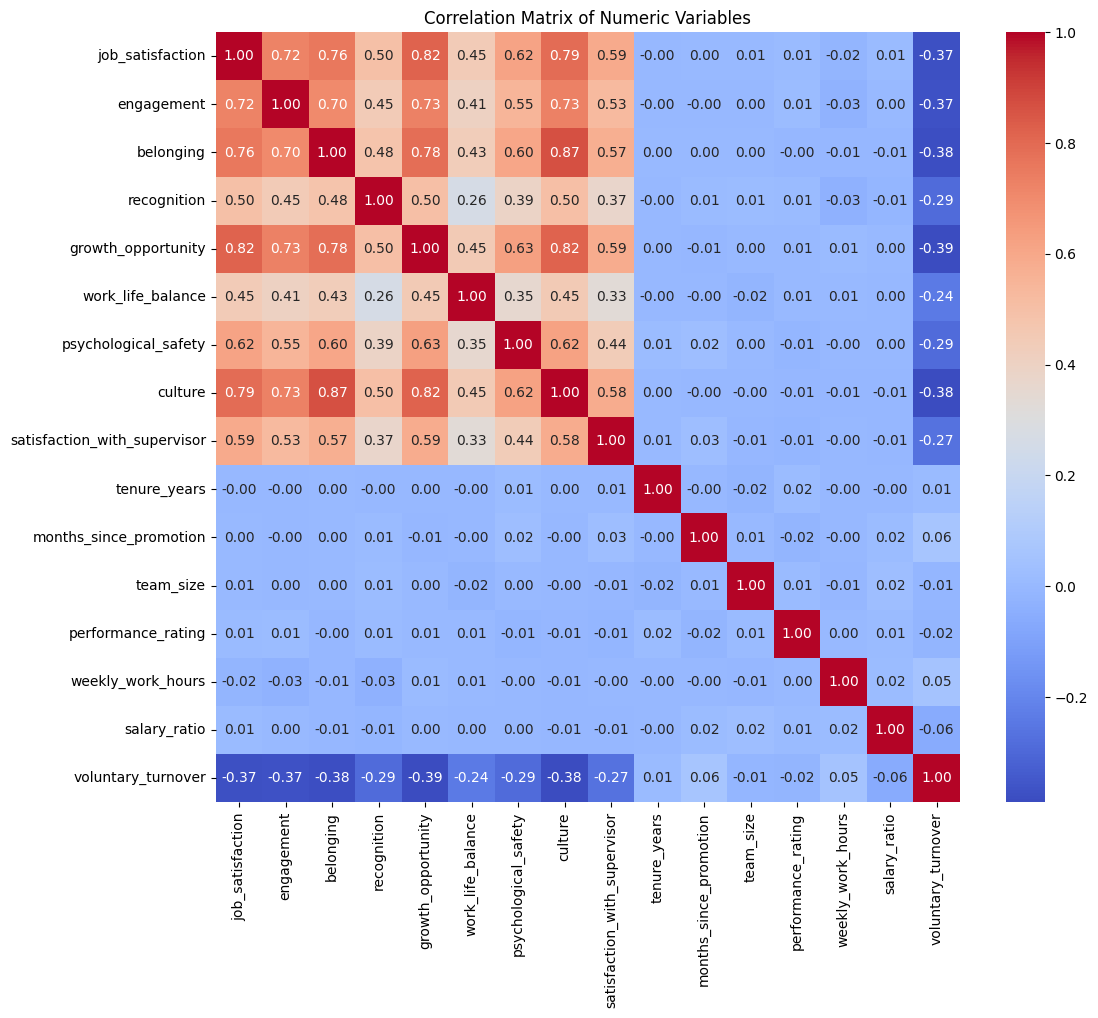

In [17]:
# prompt: create the correlations among numeric variables (excluding employee_id, job_level, department, race_ethnicity, region, work_arrangement). create a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as in the previous code.

# List of columns to exclude from correlation analysis
exclude_cols = ['employee_id', 'job_level', 'department', 'race_ethnicity', 'region', 'work_arrangement']

# Select only numeric columns, excluding the specified columns
numeric_cols = data.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Calculate the correlation matrix
correlation_matrix = data[numeric_cols].corr()
correlation_matrix.to_csv('correlation_matrix.csv', index=False)  # index=False prevents row indices from being written

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

<ipython-input-18-3e2c4f201331>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=voluntary_turnover_percentage, y=voluntary_turnover_percentage.index, palette="viridis", orient='h')


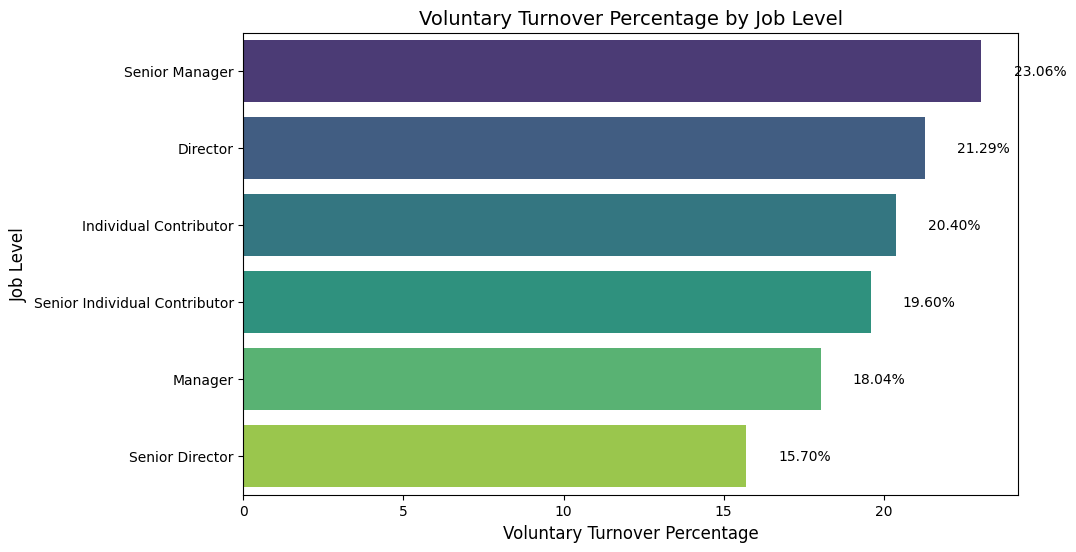

In [18]:
# prompt: create  a bar graph to show voluntary_turnover percentage by job_level. add values to the graphs.use horizontal bar.. show job_level in the descending order,  use gradient color,

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' DataFrame is already loaded as in the previous code.

# Calculate voluntary turnover percentage by job level
voluntary_turnover_percentage = data.groupby('job_level')['voluntary_turnover'].mean() * 100

# Sort job levels in descending order
voluntary_turnover_percentage = voluntary_turnover_percentage.sort_values(ascending=False)

# Create the horizontal bar plot with gradient color and values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=voluntary_turnover_percentage, y=voluntary_turnover_percentage.index, palette="viridis", orient='h')

# Add value labels to the bars
for i, v in enumerate(voluntary_turnover_percentage):
    ax.text(v + 1, i, f"{v:.2f}%", color='black', va='center')  # Adjust the +1 value for better positioning

plt.title('Voluntary Turnover Percentage by Job Level', fontsize=14)
plt.xlabel('Voluntary Turnover Percentage', fontsize=12)
plt.ylabel('Job Level', fontsize=12)
plt.show()

<ipython-input-19-b1ca49b8e832>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=voluntary_turnover_by_job_level.index, y=voluntary_turnover_by_job_level.values, palette="viridis")


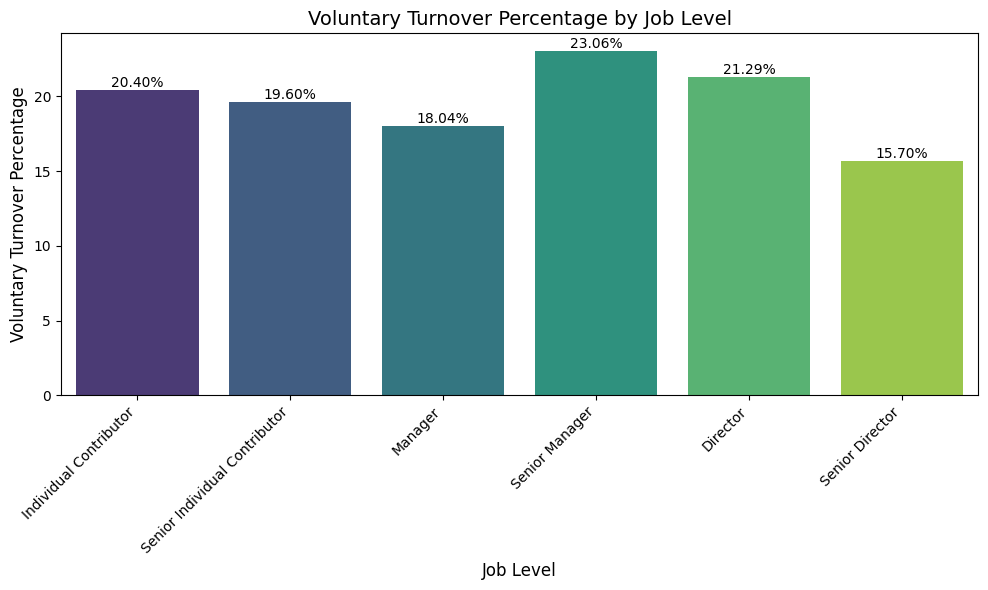

In [19]:
# prompt: create  a bar graph to show voluntary_turnover percentage by job_level. add values to the graphs. show job_level in the order of seniority (individual contributor, senior individual contributor, manager, senior manager, director, senior director). use gradient color

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' DataFrame is already loaded

# Calculate voluntary turnover percentage by job level
job_level_order = ['Individual Contributor', 'Senior Individual Contributor', 'Manager', 'Senior Manager', 'Director', 'Senior Director']
voluntary_turnover_by_job_level = data.groupby('job_level')['voluntary_turnover'].mean() * 100
voluntary_turnover_by_job_level = voluntary_turnover_by_job_level.reindex(job_level_order)


# Create the bar plot with gradient colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=voluntary_turnover_by_job_level.index, y=voluntary_turnover_by_job_level.values, palette="viridis")
plt.xlabel("Job Level", fontsize=12)
plt.ylabel("Voluntary Turnover Percentage", fontsize=12)
plt.title("Voluntary Turnover Percentage by Job Level", fontsize=14)
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

<ipython-input-20-01b0094bad71>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=turnover_percentage.values, y=turnover_percentage.index, palette="viridis")


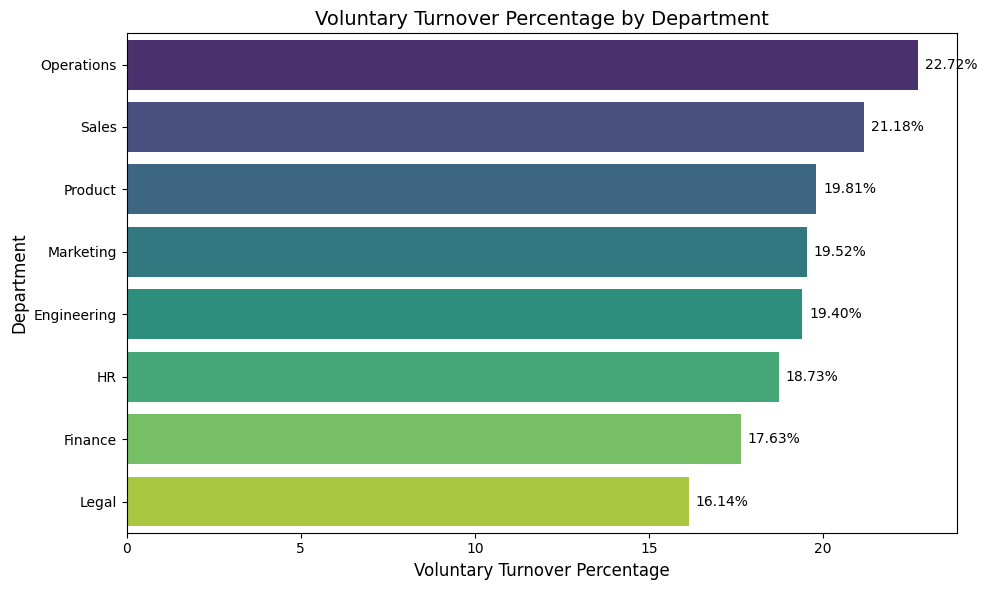

<ipython-input-20-01b0094bad71>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=turnover_percentage.values, y=turnover_percentage.index, palette="viridis")


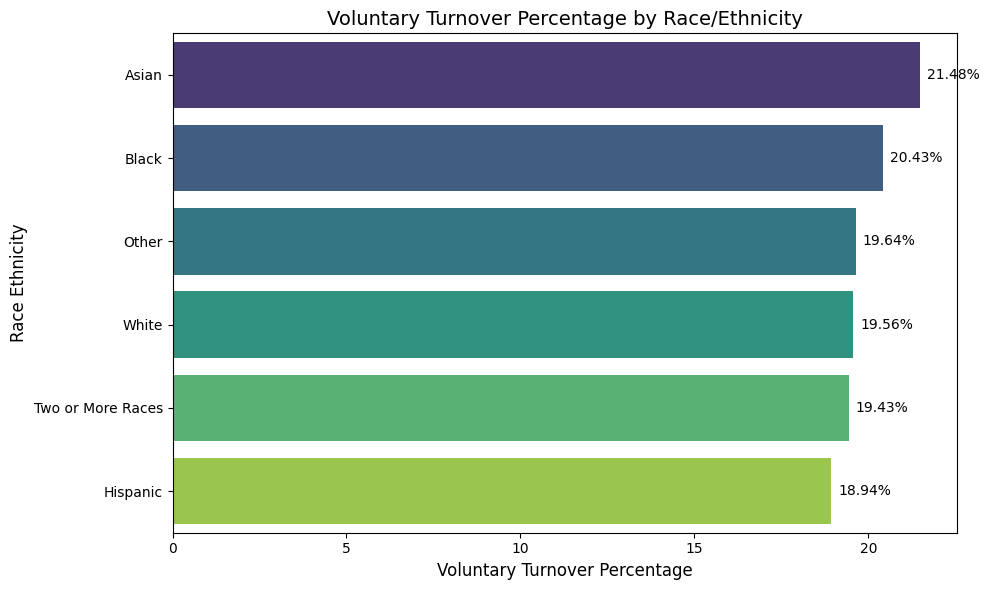

<ipython-input-20-01b0094bad71>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=turnover_percentage.values, y=turnover_percentage.index, palette="viridis")


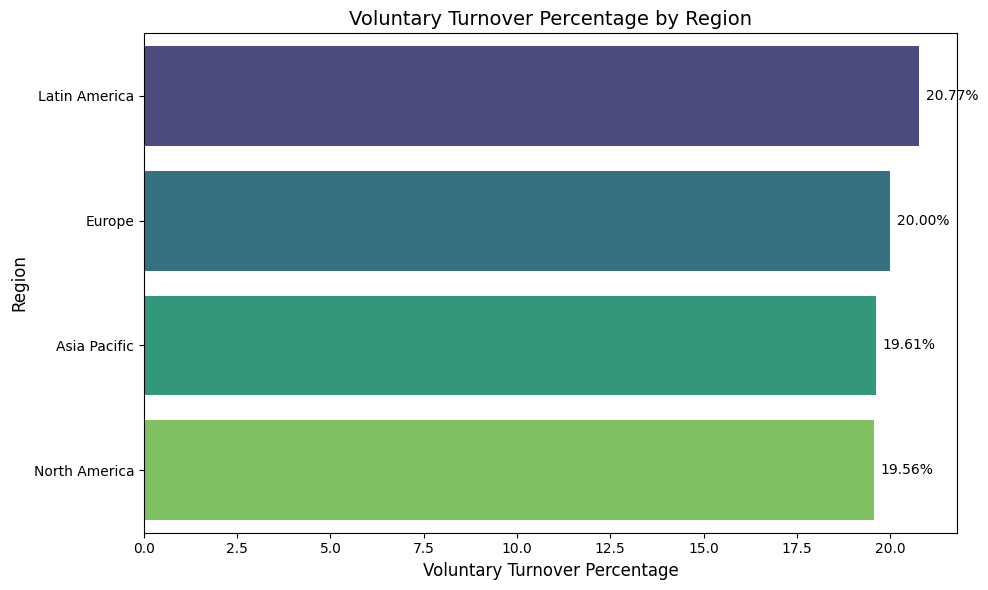

<ipython-input-20-01b0094bad71>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=turnover_percentage.values, y=turnover_percentage.index, palette="viridis")


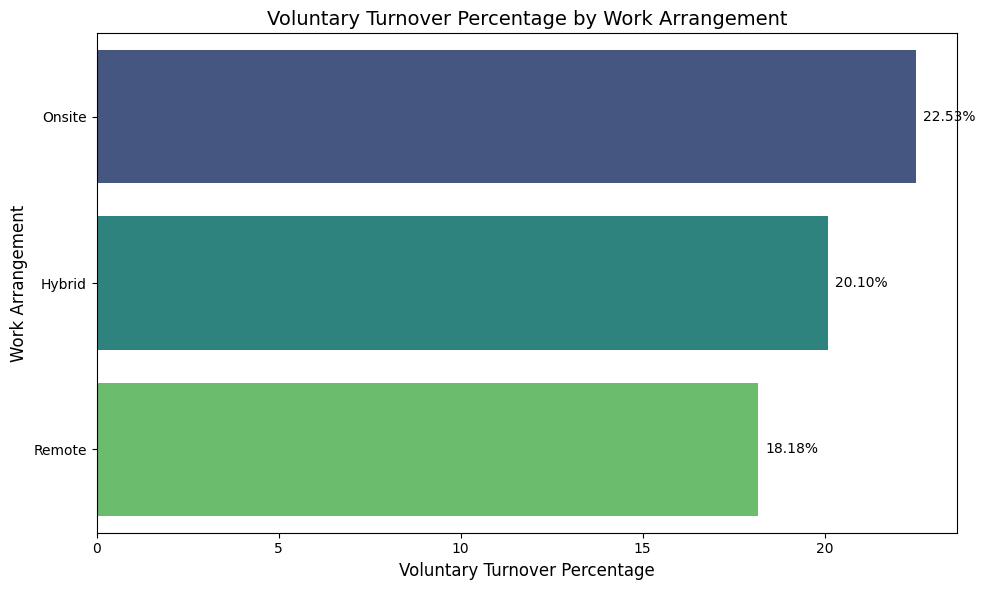

In [20]:
# prompt: create respective bar graphs to show voluntary_turnover percentage by job_level, department, race_ethnicity, region, work_arrangement. add values to the graphs. use color gradient. use horizontal bar and list the highest one on the top

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' DataFrame is already loaded

def plot_horizontal_bar_with_values(data, column_name, title):
    """Plots a horizontal bar graph with values and a color gradient."""

    turnover_percentage = data.groupby(column_name)['voluntary_turnover'].mean() * 100
    turnover_percentage = turnover_percentage.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=turnover_percentage.values, y=turnover_percentage.index, palette="viridis")
    plt.xlabel("Voluntary Turnover Percentage", fontsize=12)
    plt.ylabel(column_name.replace('_', ' ').title(), fontsize=12)
    plt.title(title, fontsize=14)

    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.2f}%", (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()


# Plotting for different columns
plot_horizontal_bar_with_values(data, 'department', "Voluntary Turnover Percentage by Department")
plot_horizontal_bar_with_values(data, 'race_ethnicity', "Voluntary Turnover Percentage by Race/Ethnicity")
plot_horizontal_bar_with_values(data, 'region', "Voluntary Turnover Percentage by Region")
plot_horizontal_bar_with_values(data, 'work_arrangement', "Voluntary Turnover Percentage by Work Arrangement")

In [21]:
## Crosstabs

# Predictive Modeling

In [22]:
# prompt: drop these variables:  'employee_id' in the dataset

X = data.drop(columns=['employee_id','voluntary_turnover'])
y = data['voluntary_turnover']

In [23]:
# Split the data into features (X) and target (y)
#X = data.drop(columns=['Unnamed: 0', 'employee_id', 'salary_band', 'voluntary_turnover'])
#y = data['voluntary_turnover']

# Split data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [24]:
# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)


In [25]:
# prompt: Apply SMOTE to the training data to handle class imbalance, and convert string to float: 'Senior Individual Contributor'

# Find columns with string values
string_cols = X_train.select_dtypes(include='object').columns

# Apply label encoding to string columns
from sklearn.preprocessing import LabelEncoder

for col in string_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [27]:
# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Initialize 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

## Initial Modeling

In [29]:
# 1. Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_cv_score = cross_val_score(log_model, X_train_scaled, y_train_resampled, cv=kfold, scoring='roc_auc')
log_model.fit(X_train_scaled, y_train_resampled)
log_y_pred = log_model.predict(X_test_scaled)

In [30]:
# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_cv_score = cross_val_score(dt_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='roc_auc')
dt_model.fit(X_train_resampled, y_train_resampled)
dt_y_pred = dt_model.predict(X_test)

In [31]:
# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_score = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='roc_auc')
rf_model.fit(X_train_resampled, y_train_resampled)
rf_y_pred = rf_model.predict(X_test)

In [32]:
# 4. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_cv_score = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='roc_auc')
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_y_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:19:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:19:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:19:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:19:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:19:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

## Model Evaluation

In [33]:
# prompt: Evaluate models using precision, recall, f-1 score, sensitivity, specificity

# Evaluate the models and print the classification report
print("Logistic Regression:")
print(classification_report(y_test, log_y_pred))
print(confusion_matrix(y_test, log_y_pred))

print("\nDecision Tree:")
print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))

print("\nRandom Forest:")
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

print("\nXGBoost:")
print(classification_report(y_test, xgb_y_pred))
print(confusion_matrix(y_test, xgb_y_pred))


def evaluate_model(y_true, y_pred):
    # Calculate and print evaluation metrics
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    # Assuming a binary classification problem
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")

print("\nLogistic Regression Evaluation:")
evaluate_model(y_test, log_y_pred)

print("\nDecision Tree Evaluation:")
evaluate_model(y_test, dt_y_pred)

print("\nRandom Forest Evaluation:")
evaluate_model(y_test, rf_y_pred)

print("\nXGBoost Evaluation:")
evaluate_model(y_test, xgb_y_pred)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       800
           1       0.41      0.56      0.47       200

    accuracy                           0.75      1000
   macro avg       0.64      0.68      0.65      1000
weighted avg       0.78      0.75      0.76      1000

[[638 162]
 [ 88 112]]

Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.78      0.81       800
           1       0.35      0.49      0.41       200

    accuracy                           0.72      1000
   macro avg       0.61      0.63      0.61      1000
weighted avg       0.76      0.72      0.73      1000

[[620 180]
 [102  98]]

Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       800
           1       0.43      0.51      0.47       200

    accuracy                           0.77      1000
   macro avg       0.65      

In [34]:
# Evaluate models using AUC-ROC
models_scores = {
    "Logistic Regression": log_cv_score.mean(),
    "Decision Tree": dt_cv_score.mean(),
    "Random Forest": rf_cv_score.mean(),
    "XGBoost": xgb_cv_score.mean()
}
models_scores

{'Logistic Regression': 0.887917170589963,
 'Decision Tree': 0.8125911156651551,
 'Random Forest': 0.9473945383577936,
 'XGBoost': 0.9429171217494327}

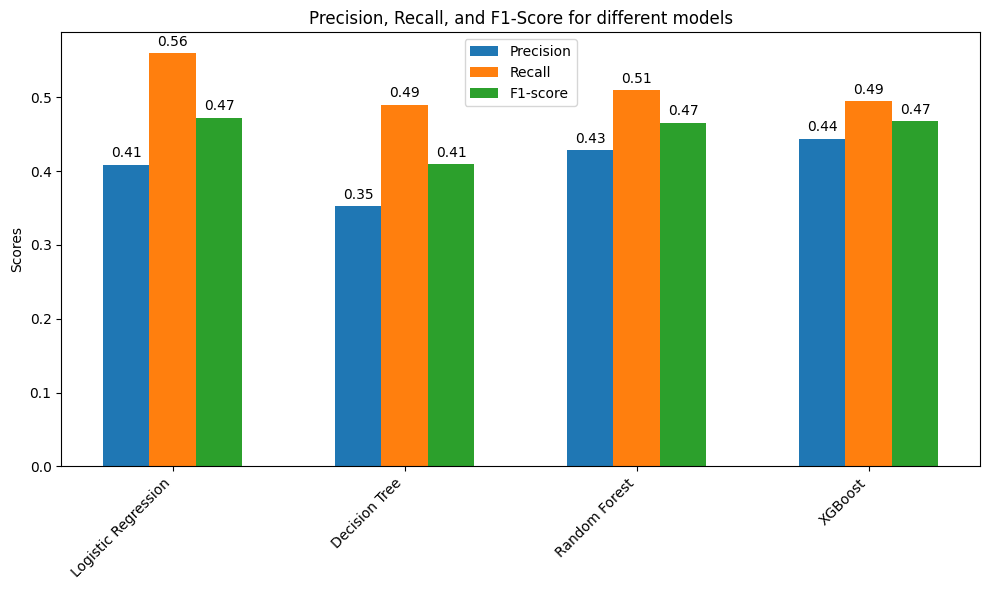

In [35]:
# prompt: Plot precision, recall, F-1 score for all models, and add values to the graph

import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# ... (Your existing code) ...

# Calculate precision, recall, and F1-score for each model
models_metrics = {}
for model_name, model, y_pred in zip(
    ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    [log_model, dt_model, rf_model, xgb_model],
    [log_y_pred, dt_y_pred, rf_y_pred, xgb_y_pred]
):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    models_metrics[model_name] = {"precision": precision, "recall": recall, "f1": f1}

# Plotting
model_names = list(models_metrics.keys())
precision_scores = [v["precision"] for v in models_metrics.values()]
recall_scores = [v["recall"] for v in models_metrics.values()]
f1_scores = [v["f1"] for v in models_metrics.values()]

x = range(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, precision_scores, width, label='Precision')
rects2 = ax.bar([i + width for i in x], recall_scores, width, label='Recall')
rects3 = ax.bar([i + 2 * width for i in x], f1_scores, width, label='F1-score')


# Add value annotations to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


add_labels(rects1)
add_labels(rects2)
add_labels(rects3)


ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for different models')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

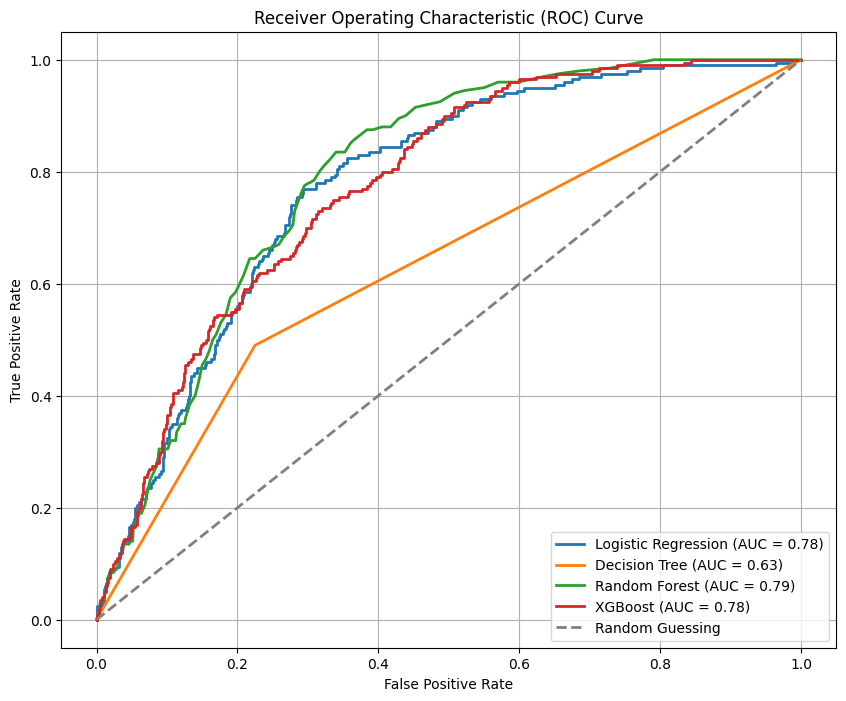

In [36]:
# prompt: Plot AUC-ROC for all models and add values to the graph

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have y_test and probability predictions for each model
# Example:
# log_y_prob = log_model.predict_proba(X_test_scaled)[:, 1]
# dt_y_prob = dt_model.predict_proba(X_test)[:, 1]  # Assuming DecisionTreeClassifier can predict probabilities
# rf_y_prob = rf_model.predict_proba(X_test)[:, 1]
# xgb_y_prob = xgb_model.predict_proba(X_test)[:, 1]


# Placeholder probability predictions - replace with your actual predictions
log_y_prob = log_model.predict_proba(X_test_scaled)[:, 1]
dt_y_prob = dt_model.predict_proba(X_test)[:,1]
rf_y_prob = rf_model.predict_proba(X_test)[:,1]
xgb_y_prob = xgb_model.predict_proba(X_test)[:,1]


plt.figure(figsize=(10, 8))

for model_name, y_prob in zip(["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
                             [log_y_prob, dt_y_prob, rf_y_prob, xgb_y_prob]):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [37]:
# Evaluate models in detail
evaluation_metrics = {
    "Logistic Regression": {
        "AUC-ROC": roc_auc_score(y_test, log_y_pred),
        "Accuracy": accuracy_score(y_test, log_y_pred),
        "F1-Score": f1_score(y_test, log_y_pred),
        "Classification Report": classification_report(y_test, log_y_pred),
        "Confusion Matrix": confusion_matrix(y_test, log_y_pred)
    },
    "Decision Tree": {
        "AUC-ROC": roc_auc_score(y_test, dt_y_pred),
        "Accuracy": accuracy_score(y_test, dt_y_pred),
        "F1-Score": f1_score(y_test, dt_y_pred),
        "Classification Report": classification_report(y_test, dt_y_pred),
        "Confusion Matrix": confusion_matrix(y_test, dt_y_pred)
    },
    "Random Forest": {
        "AUC-ROC": roc_auc_score(y_test, rf_y_pred),
        "Accuracy": accuracy_score(y_test, rf_y_pred),
        "F1-Score": f1_score(y_test, rf_y_pred),
        "Classification Report": classification_report(y_test, rf_y_pred),
        "Confusion Matrix": confusion_matrix(y_test, rf_y_pred)
    },
    "XGBoost": {
        "AUC-ROC": roc_auc_score(y_test, xgb_y_pred),
        "Accuracy": accuracy_score(y_test, xgb_y_pred),
        "F1-Score": f1_score(y_test, xgb_y_pred),
        "Classification Report": classification_report(y_test, xgb_y_pred),
        "Confusion Matrix": confusion_matrix(y_test, xgb_y_pred)
    }
}

evaluation_metrics


{'Logistic Regression': {'AUC-ROC': 0.67875,
  'Accuracy': 0.75,
  'F1-Score': 0.47257383966244726,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.88      0.80      0.84       800\n           1       0.41      0.56      0.47       200\n\n    accuracy                           0.75      1000\n   macro avg       0.64      0.68      0.65      1000\nweighted avg       0.78      0.75      0.76      1000\n',
  'Confusion Matrix': array([[638, 162],
         [ 88, 112]])},
 'Decision Tree': {'AUC-ROC': 0.6325,
  'Accuracy': 0.718,
  'F1-Score': 0.4100418410041841,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.86      0.78      0.81       800\n           1       0.35      0.49      0.41       200\n\n    accuracy                           0.72      1000\n   macro avg       0.61      0.63      0.61      1000\nweighted avg       0.76      0.72      0.73      1000\n',
  'Confusion

In [38]:
# prompt: Evaluate models using AUC-ROC, accuracy, precision ,   recall  f1-score, sensitivity, specificity

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

# ... (Your existing code) ...

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return {
        "AUC-ROC": roc_auc_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "Sensitivity": sensitivity,
        "Specificity": specificity
    }

evaluation_metrics = {
    "Logistic Regression": calculate_metrics(y_test, log_y_pred),
    "Decision Tree": calculate_metrics(y_test, dt_y_pred),
    "Random Forest": calculate_metrics(y_test, rf_y_pred),
    "XGBoost": calculate_metrics(y_test, xgb_y_pred)
}

evaluation_metrics

{'Logistic Regression': {'AUC-ROC': 0.67875,
  'Accuracy': 0.75,
  'Precision': 0.40875912408759124,
  'Recall': 0.56,
  'F1-Score': 0.47257383966244726,
  'Sensitivity': 0.56,
  'Specificity': 0.7975},
 'Decision Tree': {'AUC-ROC': 0.6325,
  'Accuracy': 0.718,
  'Precision': 0.35251798561151076,
  'Recall': 0.49,
  'F1-Score': 0.4100418410041841,
  'Sensitivity': 0.49,
  'Specificity': 0.775},
 'Random Forest': {'AUC-ROC': 0.6699999999999999,
  'Accuracy': 0.766,
  'Precision': 0.42857142857142855,
  'Recall': 0.51,
  'F1-Score': 0.4657534246575342,
  'Sensitivity': 0.51,
  'Specificity': 0.83},
 'XGBoost': {'AUC-ROC': 0.67,
  'Accuracy': 0.775,
  'Precision': 0.4439461883408072,
  'Recall': 0.495,
  'F1-Score': 0.46808510638297873,
  'Sensitivity': 0.495,
  'Specificity': 0.845}}

In [39]:
# prompt: convert evaluation_metrics object into a table

import pandas as pd

# Assuming 'evaluation_metrics' is defined as in your provided code

metrics_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')
metrics_df

,AUC-ROC,Accuracy,Precision,Recall,F1-Score,Sensitivity,Specificity
Logistic Regression,0.67875,0.750,0.408759,0.560,0.472574,0.560,0.7975
Decision Tree,0.63250,0.718,0.352518,0.490,0.410042,0.490,0.7750
Random Forest,0.67000,0.766,0.428571,0.510,0.465753,0.510,0.8300
XGBoost,0.67000,0.775,0.443946,0.495,0.468085,0.495,0.8450


In [40]:
# prompt: Using dataframe metrics_df: export the table

# Export the DataFrame to a CSV file
metrics_df.to_csv('metrics.csv', index=False)  # index=False prevents row indices from being written
print("DataFrame exported to metrics.csv")


DataFrame exported to metrics.csv


## Feature Importance (Untuned RF)

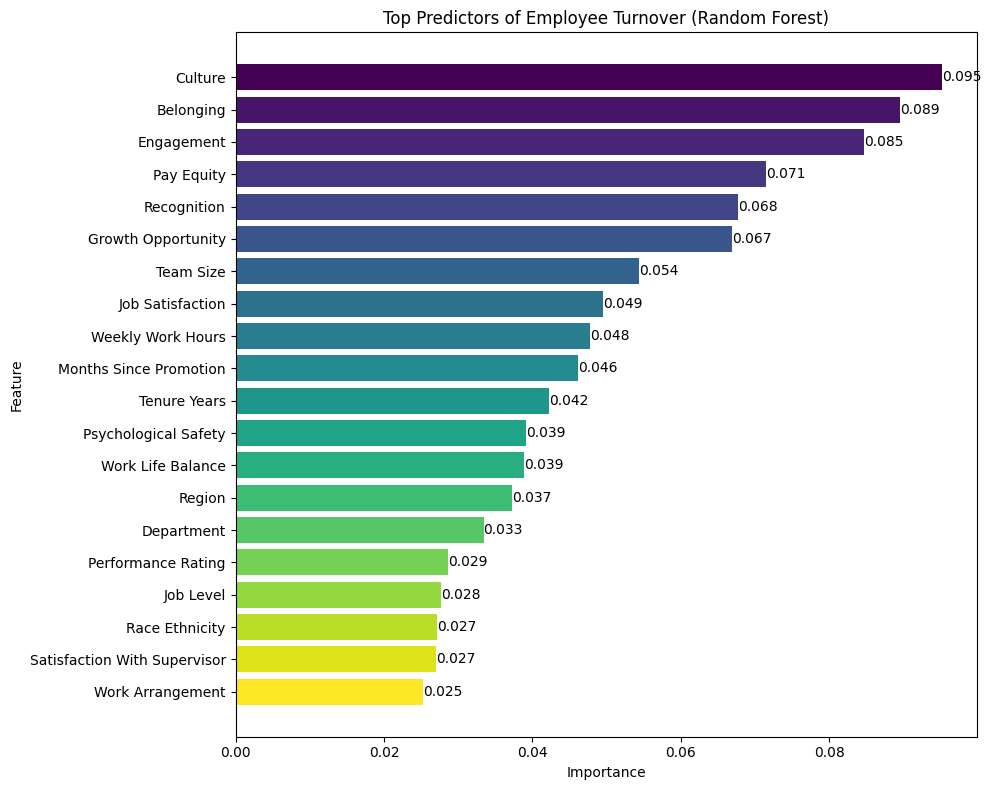

In [41]:
# prompt: generate bar graph for feature importance for the predictors in the random forest model; l; add the values to the bars (the values need to be on the bars). use gradient color. remove the underscore sign from the feature names, and capitalize each word. make the graph vertical.  use gradient color. replace 'salary_ratio' with 'Pay Equity'. list feature importance in descending order (most important feature on the top).

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming rf_model is your trained RandomForestClassifier
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier sorting and manipulation
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Replace 'salary_ratio' with 'Pay Equity'
feature_importance_df['Feature'] = feature_importance_df['Feature'].replace('salary_ratio', 'Pay Equity')


# Remove underscores and capitalize words
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.replace('_', ' ').str.title()

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)


# Create the bar plot with gradient color
plt.figure(figsize=(10, 8))
N = len(feature_importance_df)
colors = plt.cm.viridis(np.linspace(0, 1, N))  # Use viridis colormap for a gradient

bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)

# Add the values to the bars
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.3f}', va='center', ha='left')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Predictors of Employee Turnover (Random Forest)")
plt.gca().invert_yaxis() # Invert y-axis for descending order
plt.tight_layout()
plt.show()

## Hyperparameter Tuning for RF

In [42]:
# prompt: i want to hyperparameter tuning for the random forest model to improve performance

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print(f"Best parameters: {rf_random.best_params_}")
print(f"Best score: {rf_random.best_score_}")

# Use the best estimator to make predictions
best_rf_model = rf_random.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)

# ... (rest of your code for evaluation)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best score: 0.8590625


In [43]:
# prompt: generate evaluation metric for the tuned model

# ... (Your existing code) ...

# Evaluate the best Random Forest model
best_rf_metrics = calculate_metrics(y_test, rf_y_pred)
print("Best Random Forest Model Metrics:")
print(best_rf_metrics)

# Add the best Random Forest model's metrics to the evaluation_metrics dictionary
evaluation_metrics["Tuned Random Forest"] = best_rf_metrics

# Update the metrics DataFrame
metrics_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')
metrics_df

# Export the updated DataFrame to a CSV file
metrics_df.to_csv('metrics.csv', index=True)  # index=True to include model names as index
print("Updated DataFrame exported to metrics.csv")

Best Random Forest Model Metrics:
{'AUC-ROC': 0.675625, 'Accuracy': 0.769, 'Precision': 0.4351464435146444, 'Recall': 0.52, 'F1-Score': 0.47380410022779046, 'Sensitivity': 0.52, 'Specificity': 0.83125}
Updated DataFrame exported to metrics.csv


## Feature Selection for Untuned RF

In [76]:
# prompt: do feature selection to improve the model performance .

from sklearn.feature_selection import SelectFromModel

# Assuming rf_model is your trained RandomForestClassifier
# and X_train_resampled, y_train_resampled are your training data

# Feature selection using SelectFromModel with the RandomForestClassifier
selector = SelectFromModel(best_rf_model, prefit=True, threshold="median") # Use 'median' as the threshold
X_train_selected = selector.transform(X_train_resampled)

# Ensure X_test has the same columns as X_train_resampled before transforming
X_test_selected = selector.transform(X_test[X_train_resampled.columns]) # Select the same columns from X_test as in X_train_resampled

# Now you can retrain your models using X_train_selected and X_test_selected
# Example with the Random Forest model:

# Initialize a new RandomForestClassifier (or use the tuned one from before)
rf_model_selected = RandomForestClassifier(random_state=42)  # Or use rf_random.best_estimator_ if you want the tuned model

# Train the model with the selected features
rf_model_selected.fit(X_train_selected, y_train_resampled)

# Make predictions
rf_y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluate the model with selected features
print("\nRandom Forest with Selected Features:")
evaluate_model(y_test, rf_y_pred_selected)

# ... (rest of your code for evaluation with selected features)


# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("\nSelected Features:", selected_feature_names)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Random Forest with Selected Features:
Accuracy: 0.764
F1-score: 0.5042016806722689
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       800
           1       0.43      0.60      0.50       200

    accuracy                           0.76      1000
   macro avg       0.66      0.70      0.67      1000
weighted avg       0.80      0.76      0.78      1000

Confusion Matrix:
 [[644 156]
 [ 80 120]]
Sensitivity: 0.6
Specificity: 0.805

Selected Features: Index(['job_satisfaction', 'engagement', 'belonging', 'recognition',
       'growth_opportunity', 'culture', 'months_since_promotion', 'team_size',
       'weekly_work_hours', 'salary_ratio'],
      dtype='object')


In [81]:
# prompt: i want to know which features are dropped in the model that has feature selection, and which are kept

from sklearn.feature_selection import SelectFromModel

# ... (Your existing code) ...

# Assuming rf_model is your trained RandomForestClassifier
# and X_train_resampled, y_train_resampled are your training data

# Feature selection using SelectFromModel with the RandomForestClassifier
selector = SelectFromModel(best_rf_model, prefit=True, threshold="median") # Use 'median' as the threshold
X_train_selected = selector.transform(X_train_resampled)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Get the dropped feature names
dropped_feature_names = X.columns.drop(selected_feature_names)

print("Selected Features:", selected_feature_names.tolist())
print("\nDropped Features:", dropped_feature_names.tolist())

# ... (rest of your code)

Selected Features: ['job_satisfaction', 'engagement', 'belonging', 'recognition', 'growth_opportunity', 'culture', 'months_since_promotion', 'team_size', 'weekly_work_hours', 'salary_ratio']

Dropped Features: ['work_life_balance', 'psychological_safety', 'satisfaction_with_supervisor', 'tenure_years', 'job_level', 'department', 'race_ethnicity', 'region', 'work_arrangement', 'performance_rating']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Feature Importance (Final RF)

In [82]:
# prompt: use the kept predictors in Tuned Random Forest with Feature Selection to generate feature importance bar graph, add the values to the bars. use gradient color. remove the underscore sign from the feature names, and capitalize each word. make the graph vertical with the most important feature on the top(list feature importance in descending order)

import matplotlib.pyplot as plt
import numpy as np

# Assuming best_rf_model is your trained RandomForestClassifier and X_train_resampled has the selected features
feature_importances = best_rf_model.feature_importances_
feature_names = selected_feature_names

# Create a DataFrame for easier sorting and manipulation
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Replace 'salary_ratio' with 'Pay Equity' if needed
# feature_importance_df['Feature'] = feature_importance_df['Feature'].replace('salary_ratio', 'Pay Equity')

# Remove underscores and capitalize words
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.replace('_', ' ').str.title()

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create the bar plot with gradient color
plt.figure(figsize=(10, 8))
N = len(feature_importance_df)
colors = plt.cm.viridis(np.linspace(0, 1, N))  # Use viridis colormap for a gradient

bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)

# Add the values to the bars
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.3f}', va='center', ha='left')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Predictors of Employee Turnover (Tuned Random Forest with Feature Selection)")
plt.gca().invert_yaxis() # Invert y-axis for descending order
plt.tight_layout()
plt.show()

ValueError: All arrays must be of the same length

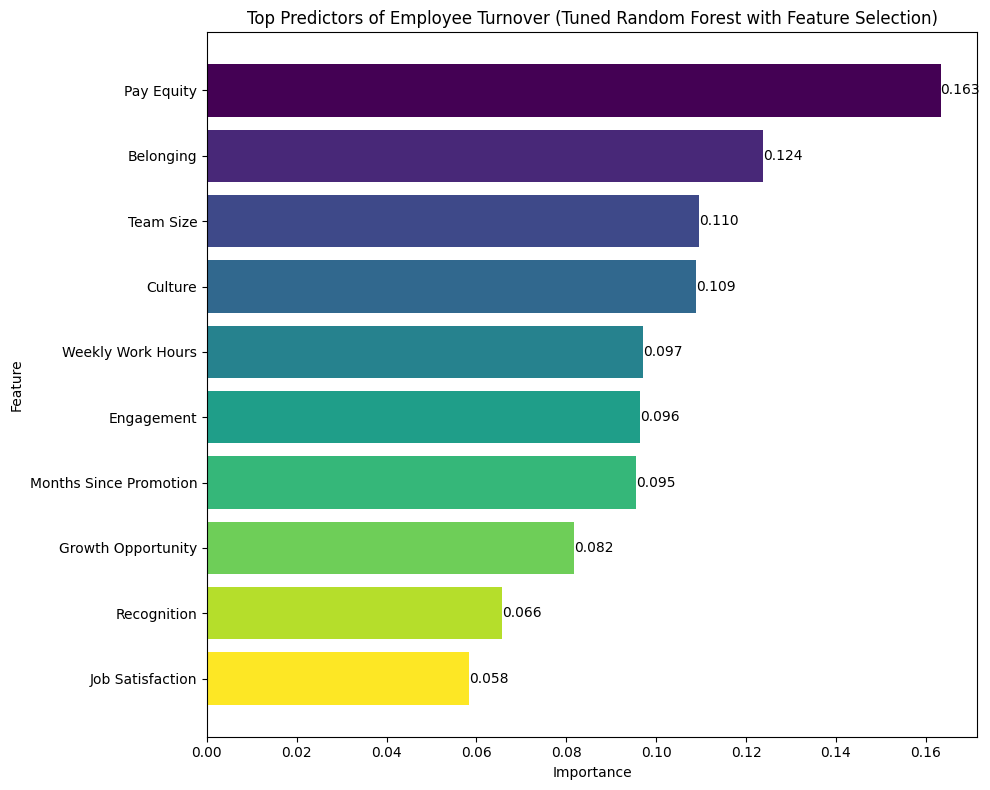

In [83]:
# prompt: use the kept predictors in Tuned Random Forest with Feature Selection to generate feature importance bar graph, add the values to the bars. use gradient color. remove the underscore sign from the feature names, and capitalize each word. make the graph vertical with the most important feature on the top(list feature importance in descending order)

import matplotlib.pyplot as plt
import numpy as np

# Assuming best_rf_model is your trained RandomForestClassifier with selected features
# and selected_feature_names are the names of the selected features

feature_importances = rf_model_selected.feature_importances_
feature_names = selected_feature_names

# Create a DataFrame for easier sorting and manipulation
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Replace 'salary_ratio' with 'Pay Equity' if needed
feature_importance_df['Feature'] = feature_importance_df['Feature'].replace('salary_ratio', 'Pay Equity')

# Remove underscores and capitalize words
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.replace('_', ' ').str.title()

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create the bar plot with gradient color
plt.figure(figsize=(10, 8))
N = len(feature_importance_df)
colors = plt.cm.viridis(np.linspace(0, 1, N))  # Use viridis colormap for a gradient

bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)

# Add the values to the bars
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.3f}', va='center', ha='left')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Predictors of Employee Turnover (Tuned Random Forest with Feature Selection)")
plt.gca().invert_yaxis() # Invert y-axis for descending order
plt.tight_layout()
plt.show()

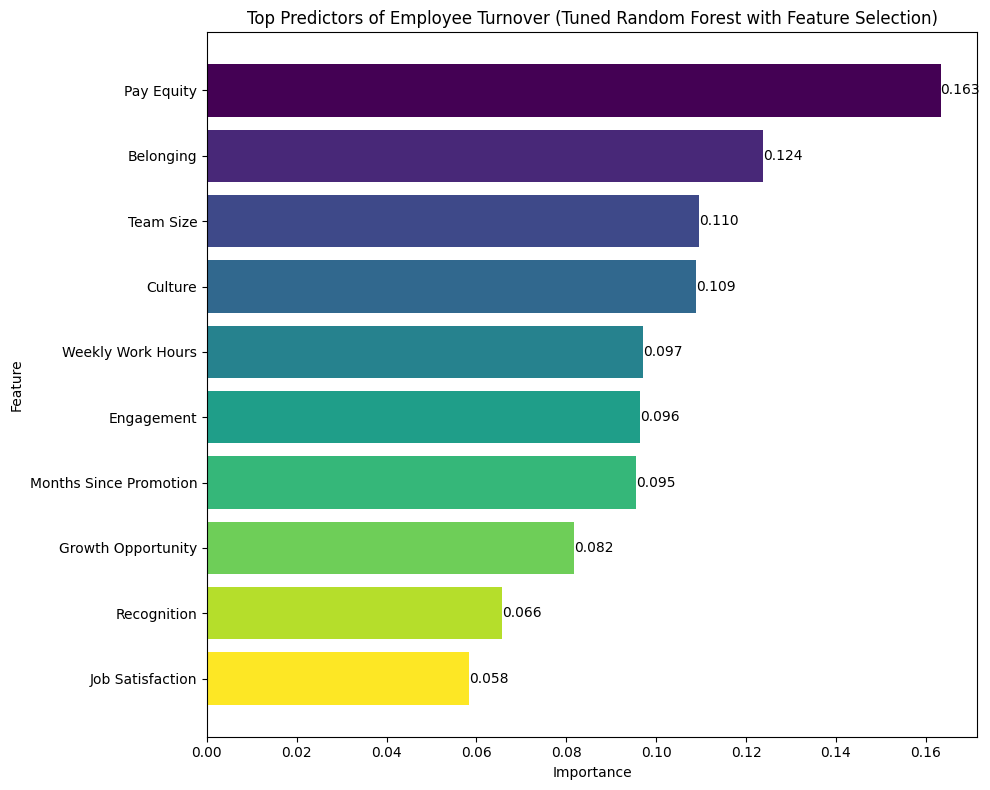

In [79]:
# prompt: use the kept predictors in rf_model_selected model to generate feature importance bar graph, add the values to the bars. use gradient color. remove the underscore sign from the feature names, and capitalize each word. make the graph vertical with the most important feature on the top(list feature importance in descending order)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming rf_model_selected and selected_feature_names are defined from previous code

feature_importances = rf_model_selected.feature_importances_
feature_names = selected_feature_names

# Create a DataFrame for easier sorting and manipulation
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Replace 'salary_ratio' with 'Pay Equity' if needed
feature_importance_df['Feature'] = feature_importance_df['Feature'].replace('salary_ratio', 'Pay Equity')

# Remove underscores and capitalize words
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.replace('_', ' ').str.title()

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create the bar plot with gradient color
plt.figure(figsize=(10, 8))
N = len(feature_importance_df)
colors = plt.cm.viridis(np.linspace(0, 1, N))  # Use viridis colormap for a gradient

bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)

# Add the values to the bars
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.3f}', va='center', ha='left')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Predictors of Employee Turnover (Tuned Random Forest with Feature Selection)")
plt.gca().invert_yaxis() # Invert y-axis for descending order
plt.tight_layout()
plt.show()

# Follow Up Analysis

In [147]:
# prompt: combine both X_train and X_test into one dataset, calculate turnover probability based on the best_rf_model model, and create a new variable by assigning high vs. low risk group for voluntary_turnover variable , using 0.7 as threshold. probabioity larger than 0.7, assign "Yes", otherwise "No"

# Combine X_train and X_test
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Predict probabilities on the combined dataset
turnover_probabilities = best_rf_model.predict_proba(X_combined)[:, 1]

# Create a new variable based on the threshold
risk_group = ['Yes' if prob > 0.7 else 'No' for prob in turnover_probabilities]

# Add the new variable to the combined dataset
X_combined['turnover_probability'] = turnover_probabilities
X_combined['risk_group'] = risk_group

In [148]:
X_combined

,job_satisfaction,engagement,belonging,recognition,growth_opportunity,work_life_balance,psychological_safety,culture,satisfaction_with_supervisor,tenure_years,...,department,team_size,race_ethnicity,region,work_arrangement,performance_rating,weekly_work_hours,salary_ratio,turnover_probability,risk_group
3366,4,3,3,2,4,2,3,3,3,2,...,0,8,1,1,1,4,60,1.076379,0.195,No
3950,4,3,3,4,3,3,3,3,3,2,...,7,8,5,3,0,4,65,0.927464,0.840,Yes
4533,4,3,3,2,3,3,4,3,4,20,...,0,6,5,1,0,4,61,0.956493,0.890,Yes
2431,4,3,4,5,3,3,4,4,3,0,...,5,10,5,3,0,4,59,1.250427,0.030,No
4260,4,5,5,4,4,4,5,4,4,7,...,7,14,0,1,1,3,59,0.947192,0.000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,4,3,4,5,4,3,5,4,4,9,...,0,5,0,1,0,4,62,1.137476,0.020,No
1914,4,3,4,2,4,4,4,4,4,5,...,1,3,0,0,1,4,65,1.109209,0.260,No
1946,4,3,3,4,3,5,3,3,4,6,...,4,5,0,3,2,5,59,1.006433,0.385,No
2018,5,5,5,4,5,5,4,5,4,3,...,6,8,0,0,2,3,62,1.050436,0.000,No


## Odds ratios for Turnover Risk

In [107]:
# prompt: import statsmodels

!pip install statsmodels
!pip install imblearn
!pip install xgboost

from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.stats.contingency_tables


In [162]:
# prompt: for the first 11 columns, create binary variable for each one where anything less than 3 is 'Low' and larger than 3 is 'High'. calculate odds ratios for each of the numeric value in the dataset  between Yes vs No in risk_group to show lower values on the variable have high odds to have 'Yes' in risk_group. export to a excel

import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Assuming X_combined and risk_group are defined as in your previous code

# Create binary variables for the first 11 columns
for col in X_combined.columns[:11]:  # Assuming the first 11 columns are numeric
    X_combined[col + '_binary'] = np.where(X_combined[col] < 3, 'Low', 'High')

# Calculate odds ratios for each of the first 11 columns
odds_ratios = {}
for col in X_combined.columns[:11]:
    contingency_table = pd.crosstab(X_combined[col + '_binary'], X_combined['risk_group'])
    odds_ratio, p_value, dof, expected = chi2_contingency(contingency_table)
    odds_ratios[col] = {"odds_ratio": odds_ratio, "p_value": p_value}

odds_ratio_df = pd.DataFrame.from_dict(odds_ratios, orient='index')
odds_ratio_df.index.name='Variable'
odds_ratio_df

,odds_ratio,p_value
Variable,,
job_satisfaction,208.140740,3.495522e-47
engagement,481.046392,1.264887e-106
belonging,448.306161,1.685557e-99
recognition,281.334752,3.843554e-63
growth_opportunity,695.065273,3.538329e-153
work_life_balance,364.471403,2.992026e-81
psychological_safety,214.297835,1.585784e-48
culture,531.161457,1.578586e-117
satisfaction_with_supervisor,280.434998,6.036746e-63


In [163]:

# Export to Excel
odds_ratio_df.to_excel("odds_ratios.xlsx")
print("Odds ratios exported to odds_ratios.xlsx")

Odds ratios exported to odds_ratios.xlsx


## Risk Ratios

###  for Turnover Risk

In [174]:
# prompt: for the first 11 columns and 'team_size', create binary variable for each one where anything less than 3 is 'Low' and larger than 3 is 'High'.. calculate risk ratios for each of the numeric value in the dataset  between Low vs. High in risk_group.

# Assuming X_combined and risk_group are defined as in your previous code

# Create binary variables for the first 11 columns and 'team_size'
for col in X_combined.columns[:11].tolist() + ['team_size']:
    X_combined[col + '_binary'] = np.where(X_combined[col] < 3, 'Low', 'High')

# Calculate risk ratios for each numeric column
risk_ratios = {}
for col in X_combined.columns[:11].tolist() + ['team_size']:
    # Create the contingency table
    contingency_table = pd.crosstab(X_combined[col + '_binary'], X_combined['risk_group'])

    # Calculate risk ratios
    risk_ratio = contingency_table.loc['High', 'Yes'] / contingency_table.loc['Low', 'Yes']
    risk_ratios[col] = risk_ratio

risk_ratio_df = pd.DataFrame.from_dict(risk_ratios, orient='index', columns=['Risk Ratio'])
risk_ratio_df.index.name = 'Variable'
print(risk_ratio_df)

# Export to Excel
risk_ratio_df.to_excel("risk_ratios.xlsx")
print("Risk ratios exported to risk_ratios.xlsx")

                              Risk Ratio
Variable                                
job_satisfaction                7.264706
engagement                      1.523952
belonging                       2.145522
recognition                     1.539157
growth_opportunity              0.856828
work_life_balance               1.266129
psychological_safety            3.508021
culture                         1.601852
satisfaction_with_supervisor    2.426829
tenure_years                    1.128788
months_since_promotion          1.773026
team_size                      16.936170
Risk ratios exported to risk_ratios.xlsx


In [173]:

risk_ratio_df.to_excel("risk_ratios.xlsx")
print("Risk ratios exported to risk_ratios.xlsx")
risk_ratio_df

Risk ratios exported to risk_ratios.xlsx


,Risk Ratio
Variable,
job_satisfaction,7.264706
engagement,1.523952
belonging,2.145522
recognition,1.539157
growth_opportunity,0.856828
work_life_balance,1.266129
psychological_safety,3.508021
culture,1.601852
satisfaction_with_supervisor,2.426829


In [170]:
# # prompt: for the first 11 columns, create binary variable for each one where anything less than 3 is 'Low' and larger than 3 is 'High'.. calculate risk ratios for each of the numeric value in the dataset  between Low vs. High in risk_group.

# # Assuming X_combined and risk_group are defined as in your previous code

# # Create binary variables for the first 11 columns
# for col in X_combined.columns[:11]:  # Assuming the first 11 columns are numeric
#     X_combined[col + '_binary'] = np.where(X_combined[col] < 3, 'Low', 'High')

# # Calculate risk ratios for each of the first 11 columns
# risk_ratios = {}
# for col in X_combined.columns[:11]:
#     # Create contingency table
#     contingency_table = pd.crosstab(X_combined[col + '_binary'], X_combined['risk_group'])

#     # Calculate risk ratio
#     risk_ratio = contingency_table.loc['High', 'Yes'] / contingency_table.loc['Low', 'Yes']

#     # Calculate risk difference
#     risk_difference = (contingency_table.loc['High', 'Yes'] / contingency_table.loc['High',:].sum()) - (contingency_table.loc['Low','Yes'] / contingency_table.loc['Low',:].sum())

#     risk_ratios[col] = {"risk_ratio": risk_ratio, "risk_difference": risk_difference}

# risk_ratio_df = pd.DataFrame.from_dict(risk_ratios, orient='index')
# risk_ratio_df.index.name = 'Variable'
# print(risk_ratio_df)

# # Export to Excel
# risk_ratio_df.to_excel("risk_ratios.xlsx")
# print("Risk ratios exported to risk_ratios.xlsx")

                              risk_ratio  risk_difference
Variable                                                 
job_satisfaction                7.264706        -0.412932
engagement                      1.523952        -0.326191
belonging                       2.145522        -0.359896
recognition                     1.539157        -0.228144
growth_opportunity              0.856828        -0.346899
work_life_balance               1.266129        -0.253049
psychological_safety            3.508021        -0.272337
culture                         1.601852        -0.357061
satisfaction_with_supervisor    2.426829        -0.273605
tenure_years                    1.128788        -0.001863
months_since_promotion          1.773026         0.022338
Risk ratios exported to risk_ratios.xlsx


In [169]:
risk_ratio_df

,risk_ratio,p_value,odds_ratio
Variable,,,
job_satisfaction,0.138918,3.495522e-47,208.140740
engagement,0.169011,1.264887e-106,481.046392
belonging,0.154951,1.685557e-99,448.306161
recognition,0.262667,3.843554e-63,281.334752
growth_opportunity,0.135326,3.538329e-153,695.065273
work_life_balance,0.226582,2.992026e-81,364.471403
psychological_safety,0.235970,1.585784e-48,214.297835
culture,0.149568,1.578586e-117,531.161457
satisfaction_with_supervisor,0.226598,6.036746e-63,280.434998


In [176]:
# # prompt: calculate odds ratios in risk_group  for each of the numeric variables

# import pandas as pd
# from scipy.stats import chi2_contingency
# import numpy as np

# # Assuming X_combined and risk_group are defined as in the previous code

# def calculate_odds_ratio(df, column, risk_group):
#     contingency_table = pd.crosstab(df[column], df[risk_group])
#     odds_ratio, p_value, _, _ = chi2_contingency(contingency_table)
#     return odds_ratio, p_value

# numeric_cols = X_combined.select_dtypes(include=np.number).columns

# odds_ratios = {}
# for col in numeric_cols:
#     odds_ratio, p_value = calculate_odds_ratio(X_combined, col, 'risk_group')
#     odds_ratios[col] = {'odds_ratio': odds_ratio, 'p_value': p_value}

# odds_ratios_df = pd.DataFrame.from_dict(odds_ratios, orient='index')
# odds_ratios_df

In [126]:
# # prompt: Using dataframe odds_ratios_df: export to an excel

# # Export the DataFrame to an Excel file
# odds_ratios_df.to_excel('odds_ratios.xlsx', index=False)  # index=False prevents row indices from being written
# #The file will be saved in the current working directory.


In [175]:
# # prompt: conduct logistic regression where job_satisfaction is the predictor voluntary_turnover_risk is the outcome, and get odds ratio

# import statsmodels.api as sm

# # Assuming 'X' contains your features and 'y' your target variable
# # and you've already preprocessed your data (e.g., scaling, encoding)

# # Select only the 'job_satisfaction' feature for the logistic regression
# X_job_satisfaction = X[['job_satisfaction']]

# # Add a constant to the predictor variable
# X_job_satisfaction = sm.add_constant(X_job_satisfaction)

# # Fit the logistic regression model
# logit_model = sm.Logit(y, X_job_satisfaction)
# result = logit_model.fit()

# # Print the model summary to get the coefficients and other information
# print(result.summary())

# # Get the odds ratio
# odds_ratio = np.exp(result.params['job_satisfaction'])
# print(f"Odds Ratio for job_satisfaction: {odds_ratio}")

### For performance

In [189]:
# prompt: for the first 11 columns, 'performance_rating',  and 'team_size', create binary variable for each one where anything less than 3 is 'Low' and larger than 3 is 'High'. calculate risk ratios for each of the numeric value in the dataset  between Low vs. High in performance_rating_binary.

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming X_combined and risk_group are defined from previous code

# Create binary variables for the first 11 columns, 'performance_rating', and 'team_size'
for col in X_combined.columns[:11].tolist() + ['performance_rating', 'team_size']:
    X_combined[col + '_binary'] = np.where(X_combined[col] < 3, 'Low', 'High')
X_combined

,job_satisfaction,engagement,belonging,recognition,growth_opportunity,work_life_balance,psychological_safety,culture,satisfaction_with_supervisor,tenure_years,...,recognition_binary,growth_opportunity_binary,work_life_balance_binary,psychological_safety_binary,culture_binary,satisfaction_with_supervisor_binary,tenure_years_binary,months_since_promotion_binary,team_size_binary,performance_rating_binary
3366,4,3,3,2,4,2,3,3,3,2,...,Low,High,Low,High,High,High,Low,Low,High,High
3950,4,3,3,4,3,3,3,3,3,2,...,High,High,High,High,High,High,Low,High,High,High
4533,4,3,3,2,3,3,4,3,4,20,...,Low,High,High,High,High,High,High,Low,High,High
2431,4,3,4,5,3,3,4,4,3,0,...,High,High,High,High,High,High,Low,Low,High,High
4260,4,5,5,4,4,4,5,4,4,7,...,High,High,High,High,High,High,High,Low,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,4,3,4,5,4,3,5,4,4,9,...,High,High,High,High,High,High,High,High,High,High
1914,4,3,4,2,4,4,4,4,4,5,...,Low,High,High,High,High,High,High,Low,High,High
1946,4,3,3,4,3,5,3,3,4,6,...,High,High,High,High,High,High,High,High,High,High
2018,5,5,5,4,5,5,4,5,4,3,...,High,High,High,High,High,High,High,High,High,High


In [191]:

# Calculate risk ratios for each numeric column, comparing Low vs. High in 'performance_rating_binary'
risk_ratios = {}
for col in X_combined.columns[:11].tolist() + ['team_size']:
    # Create the contingency table
    contingency_table = pd.crosstab(X_combined[col + '_binary'], X_combined['performance_rating_binary'])

    # Calculate risk ratios
    try:  # Handle potential ZeroDivisionError if a category has no 'Yes' in 'risk_group'
        risk_ratio = contingency_table.loc['High', 'High'] / contingency_table.loc['Low', 'High']
        risk_ratios[col] = risk_ratio
    except ZeroDivisionError:
        risk_ratios[col] = np.nan  # Or another suitable value to indicate an undefined risk ratio

risk_ratio_df = pd.DataFrame.from_dict(risk_ratios, orient='index', columns=['Risk Ratio'])
risk_ratio_df.index.name = 'Variable'
print(risk_ratio_df)

# # Export to Excel
risk_ratio_df.to_excel("risk_ratios_performance.xlsx")
print("Risk ratios exported to risk_ratios_performance.xlsx")

                              Risk Ratio
Variable                                
job_satisfaction               27.645963
engagement                      5.723032
belonging                       8.205589
recognition                     4.406800
growth_opportunity              3.932620
work_life_balance               4.002169
psychological_safety           10.007160
culture                         6.414791
satisfaction_with_supervisor    7.370236
tenure_years                    1.136174
months_since_promotion          1.527123
team_size                      17.672065
Risk ratios exported to risk_ratios_performance.xlsx


In [187]:
# prompt: calculate risk ratios for each of the numeric value in the dataset  between Low vs. High in performance_rating_binary.

# Assuming X_combined and risk_group are defined as in your previous code

# Calculate risk ratios for each numeric column
risk_ratios = {}
for col in X_combined.columns[:11]:
    # Create the contingency table
    contingency_table = pd.crosstab(X_combined[col + '_binary'], X_combined['performance_rating_binary'])

    # Calculate risk ratios
    risk_ratio = contingency_table.loc['High', 'High'] / contingency_table.loc['Low', 'High']
    risk_ratios[col] = risk_ratio

risk_ratio_df = pd.DataFrame.from_dict(risk_ratios, orient='index', columns=['Risk Ratio'])
risk_ratio_df.index.name = 'Variable'
print(risk_ratio_df)

# Export to Excel
risk_ratio_df.to_excel("risk_ratios_performance.xlsx")
print("Risk ratios exported to risk_ratios_performance.xlsx")

                              Risk Ratio
Variable                                
job_satisfaction               27.645963
engagement                      5.723032
belonging                       8.205589
recognition                     4.406800
growth_opportunity              3.932620
work_life_balance               4.002169
psychological_safety           10.007160
culture                         6.414791
satisfaction_with_supervisor    7.370236
tenure_years                    1.136174
months_since_promotion          1.527123
Risk ratios exported to risk_ratios_performance.xlsx
